In [2]:
#imports
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk import word_tokenize
import spacy 
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()


In [3]:
df = pd.read_csv('meta_features.csv')

In [4]:
df.head()

,article_id,propaganda,propaganda_type,text,prop_txt_snippet,sent_#,sentiment_score,abs_sent_score,punct_count,word_count,%adj,%verb,%adv,%noun,avg_word_length
0,701225819,non-propaganda,NaN,South Florida Muslim Leader Sofian Zakkout’s D...,NaN,1,0.0000,0.0000,0,9,0.000000,0.000000,0.000000,0.000000,5.444444
1,701225819,propaganda,"Name_Calling,Labeling","David Duke, the white supremacist icon and for...",Grand Wizard of the Ku Klux Klan,2,0.5423,0.5423,4,26,0.020548,0.006849,0.013699,0.006849,4.423077
2,701225819,propaganda,Loaded_Language,"However, one individual who represents the Mus...",enamored,3,0.3612,0.3612,4,27,0.017241,0.017241,0.005747,0.022989,5.000000
3,701225819,non-propaganda,NaN,"Last month, once again, Zakkout chose to showc...",NaN,4,0.0000,0.0000,5,22,0.021127,0.021127,0.014085,0.035211,5.045455
4,701225819,non-propaganda,NaN,The postings can be rivaled only by Zakkout’s ...,NaN,5,0.0000,0.0000,1,11,0.014493,0.043478,0.014493,0.028986,4.636364


# EDA

In [5]:
prop = df[df['propaganda']=='propaganda']
non_prop = df[df['propaganda']=='non-propaganda']

## Class Distribution

### Propaganda vs. Non-Propaganda

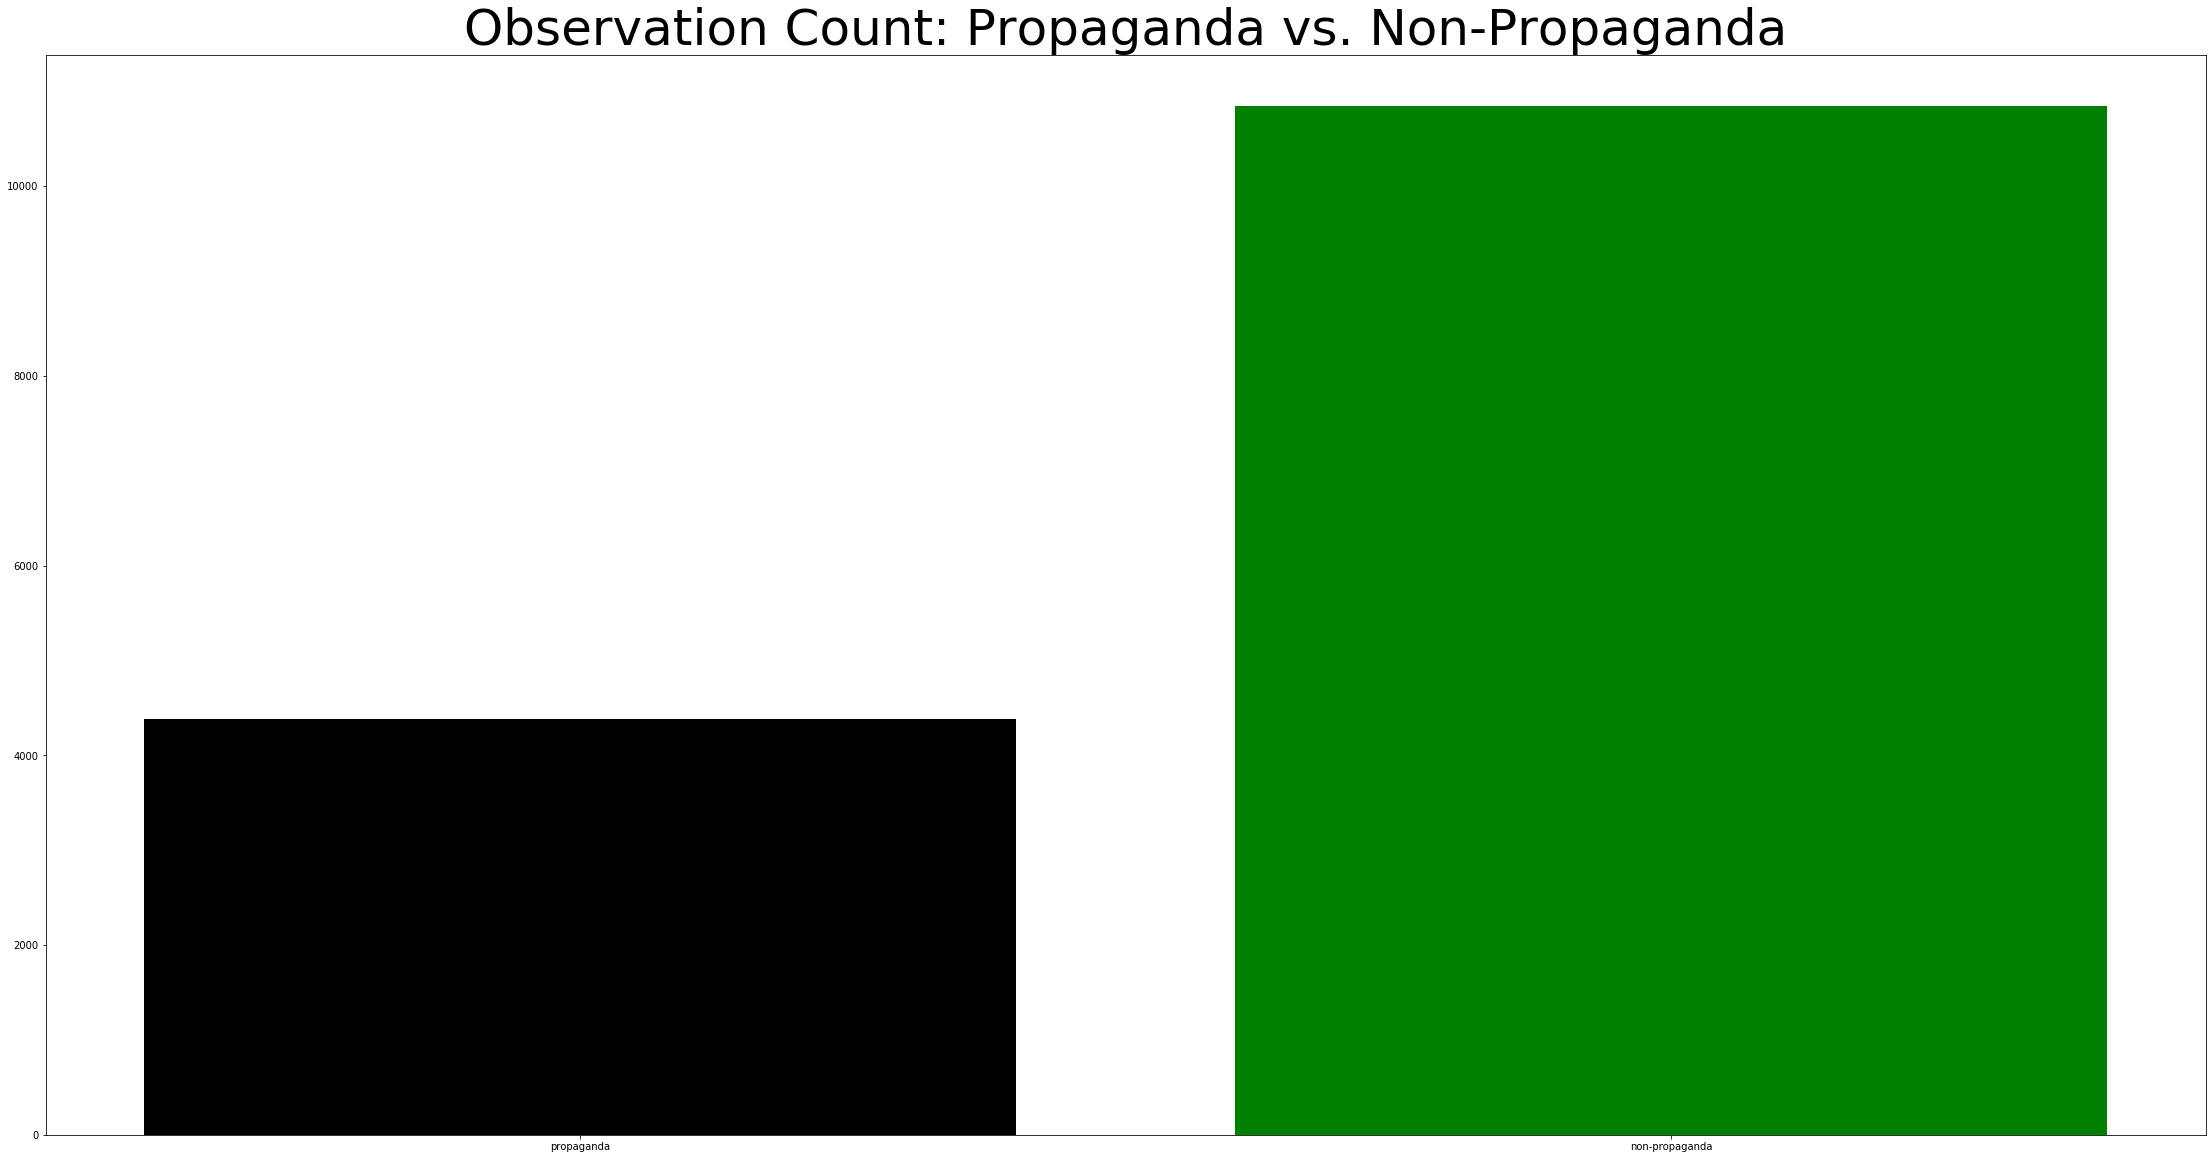

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])

labels = ['propaganda','non-propaganda']

x_1 = len(prop)
x_2 = len(non_prop)

heights = [x_1,x_2]
ax.bar(labels,heights,color=['black', 'green'])
plt.title('Observation Count: Propaganda vs. Non-Propaganda', fontsize=50)

plt.rc('xtick', labelsize=40)     
plt.rc('ytick', labelsize=40)
plt.show()

### Different Propaganda Sub-Categories

In [7]:
prop['propaganda_type'] = ['Unlabeled' if type(prop)==np.float else prop for prop in prop['propaganda_type']]

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Get propaganda type labels and counts

In [13]:
labels_1 = prop.propaganda_type.unique()
heights_1 = [len(prop[prop['propaganda_type']==type_]) for type_ in labels_1]


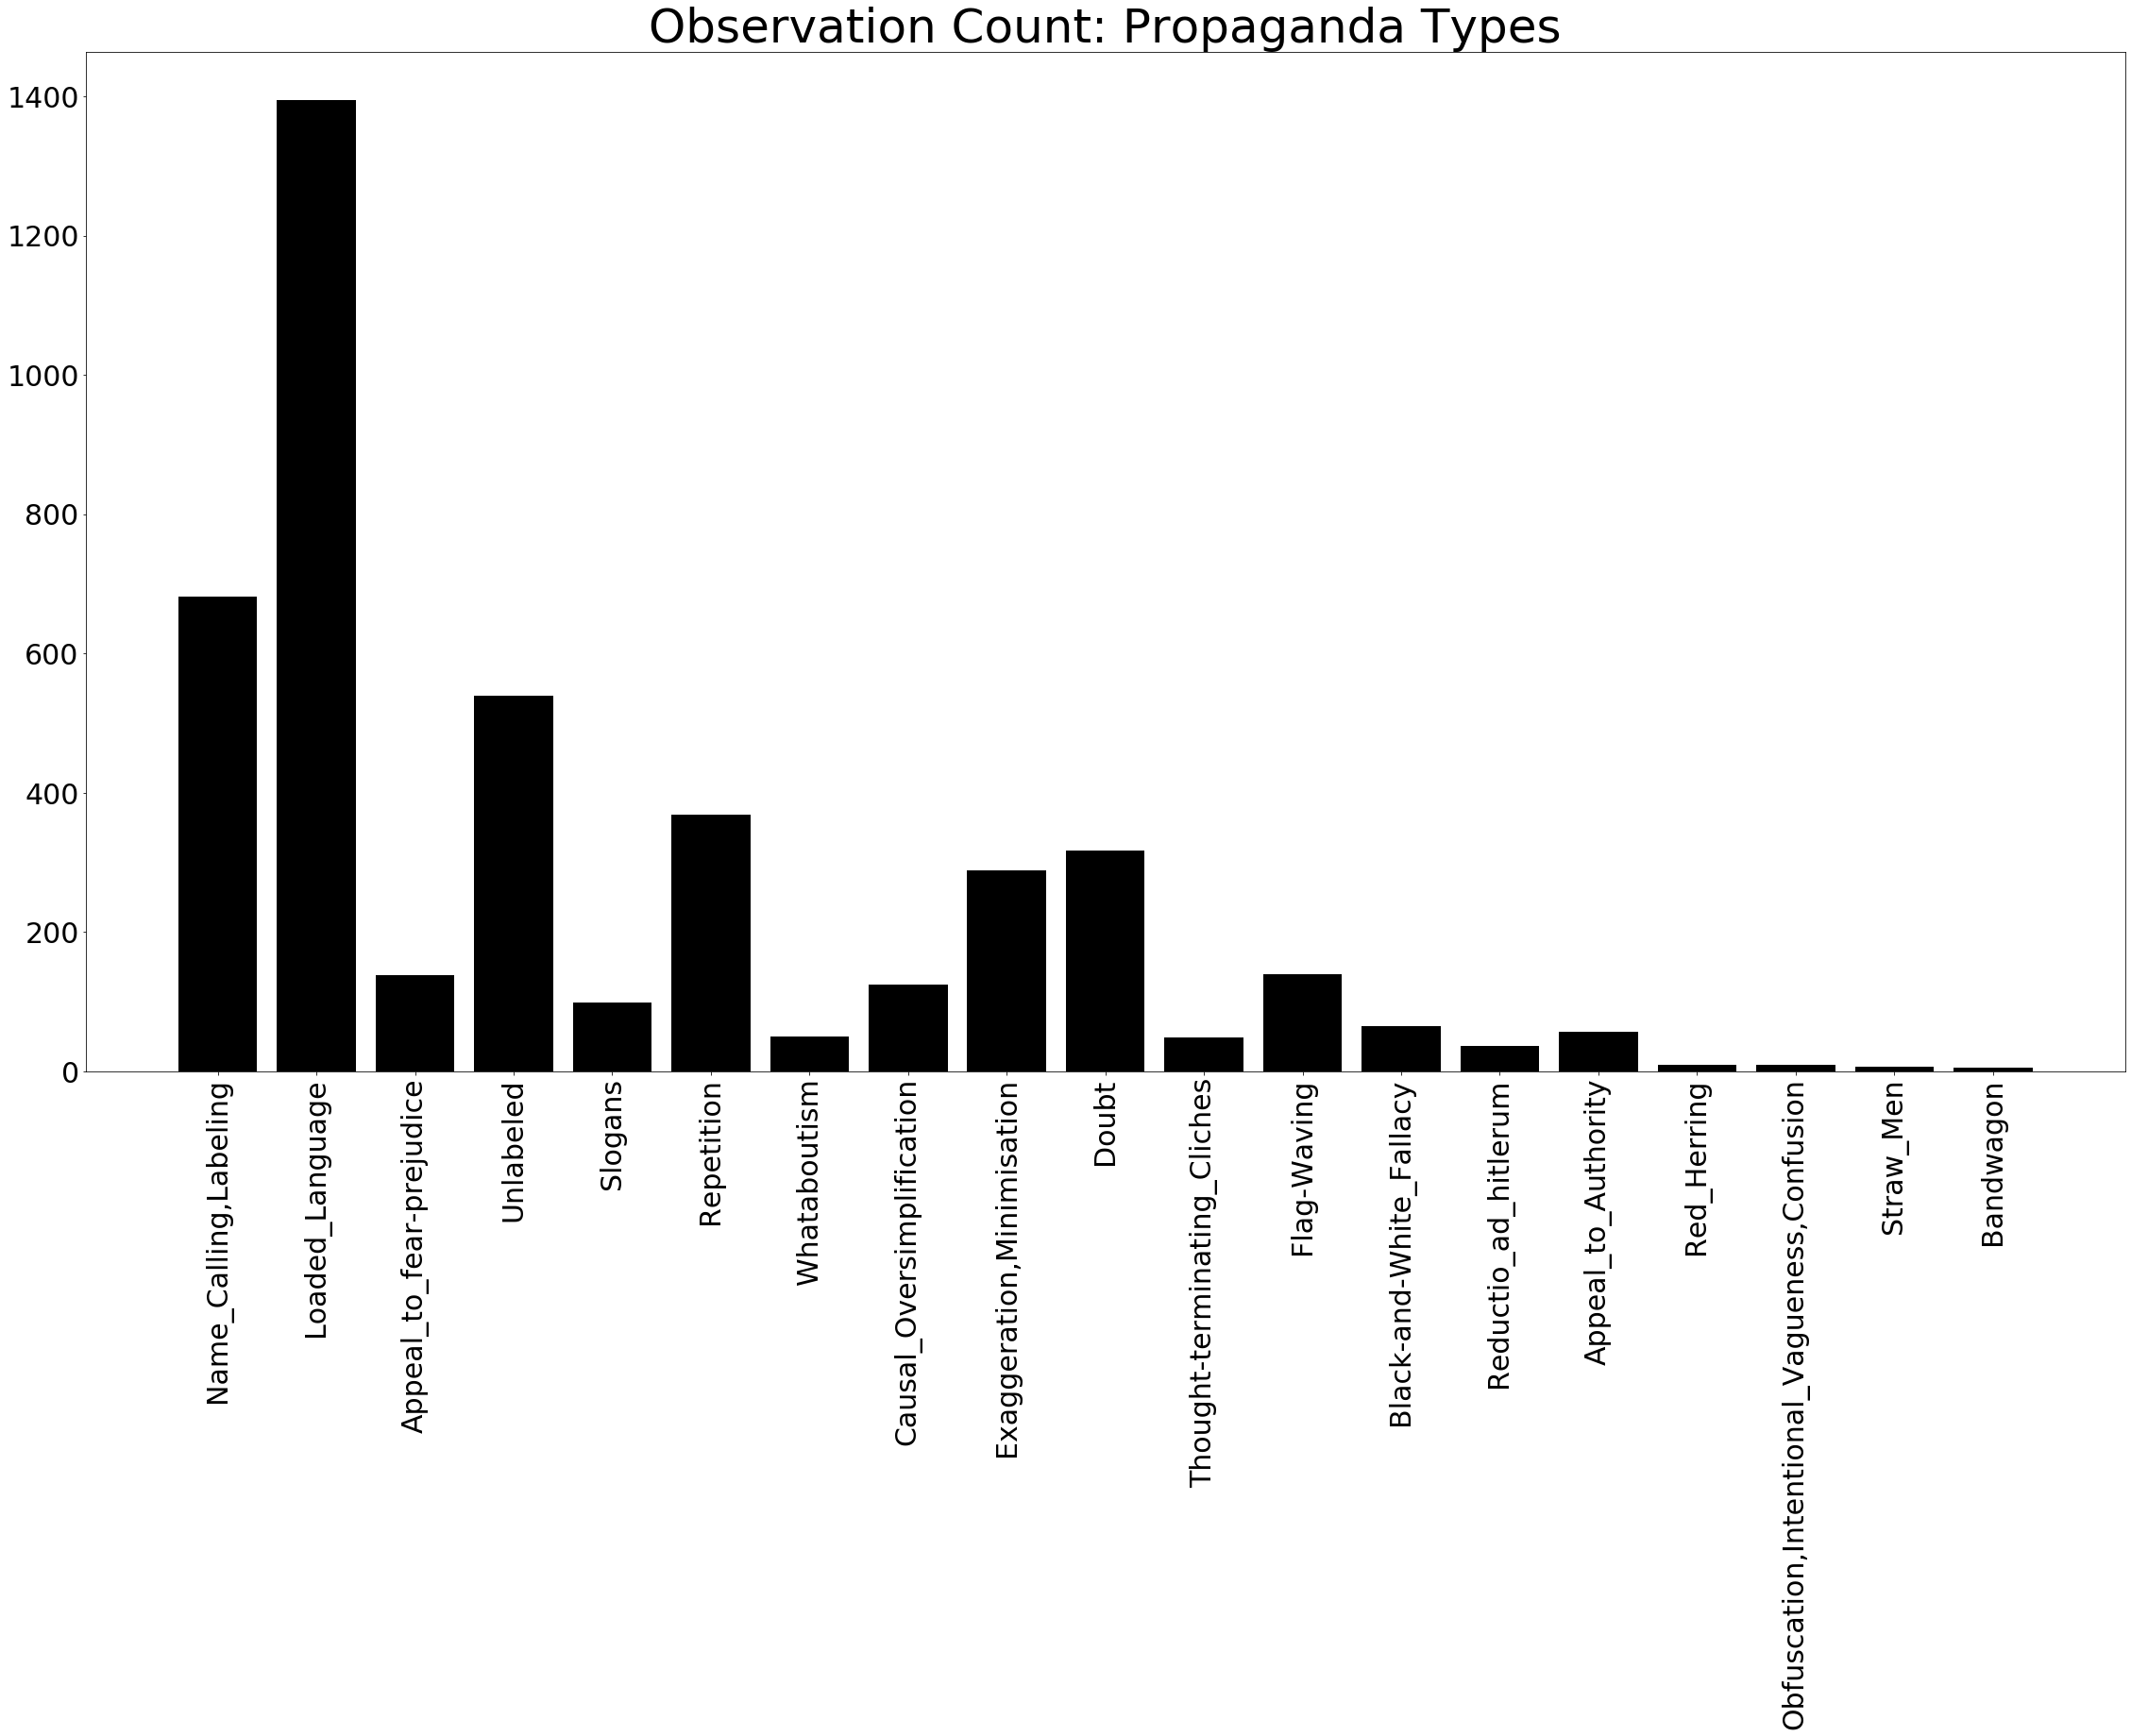

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])

ax.bar(labels_1,heights_1,color='black')
plt.title('Observation Count: Propaganda Types', fontsize=50)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=30)
plt.show()


# EDA for Meta-Features

In [267]:
df_1.columns

Index(['Unnamed: 0', 'article_id', 'sentence_char_start', 'sentence_char_end', 'propaganda', 'propaganda_type', 'text', 'prop_start_char', 'prop_end_char', 'prop_txt_snippet', 'sent_#', 'sentiment_score', 'punct_count', 'word_count', 'avg_word_length'], dtype='object')

## Sentiment Score

### Average Sentiment Score for Propaganda and Non-Propaganda

In [340]:
avg_prop_sent = prop['sentiment_score'].mean()
avg_non_prop_sent = non_prop['sentiment_score'].mean()
print(avg_prop_sent,avg_non_prop_sent)

-0.11065090203242749 0.0029635089013928403


### Distribution of Sentiment Average: Propaganda vs. Non-Propaganda:
#### Propaganda has a slight skew towards negative sentiment scores. This supports the difference in average sentiment scores from above.

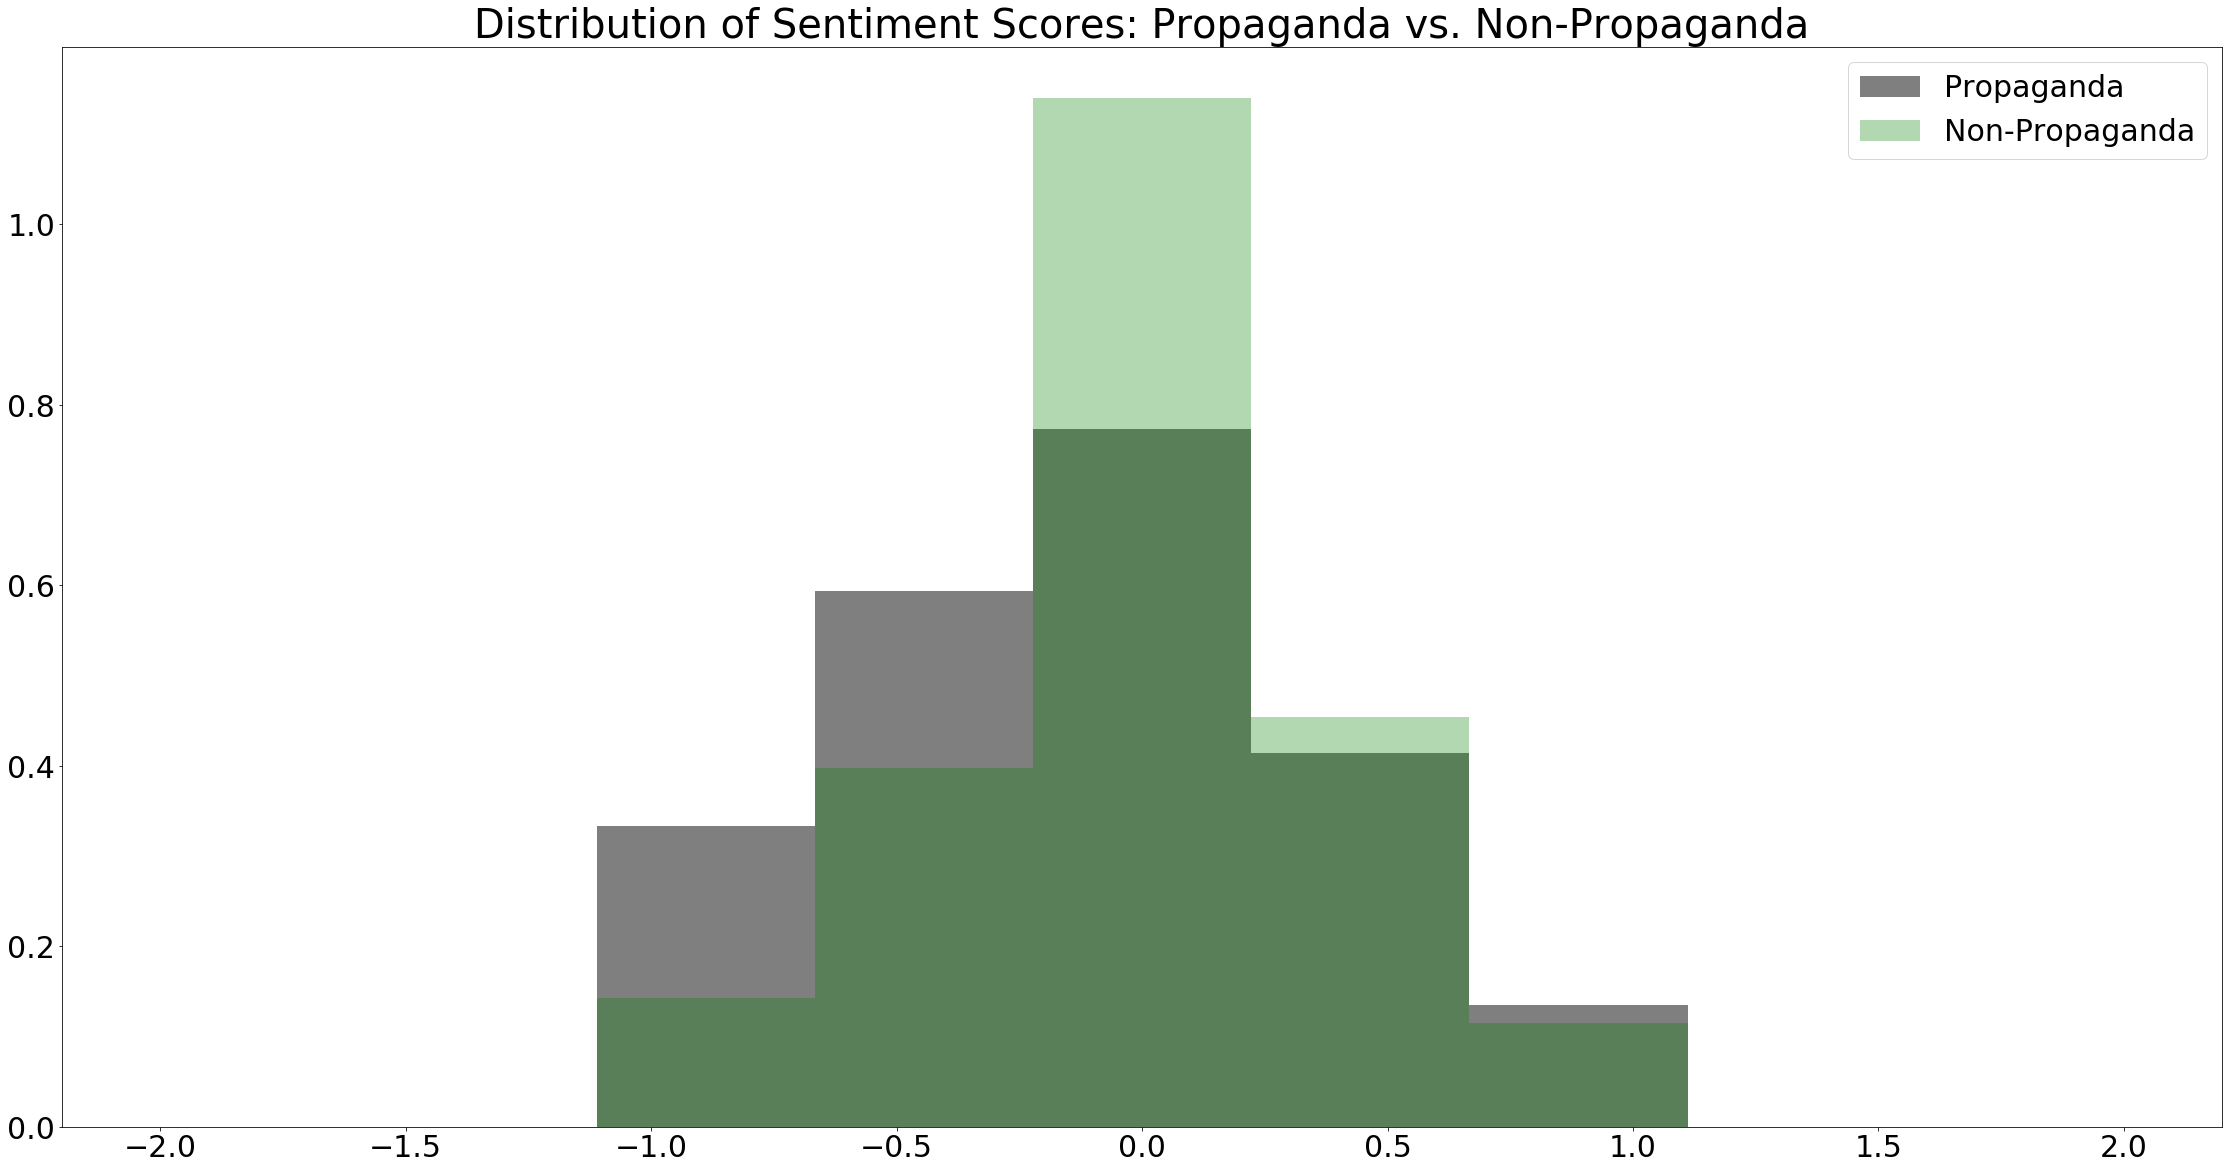

In [37]:

from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])
bins = np.linspace(-2, 2, 10)
prop_sent = prop['sentiment_score'].get_values()
non_prop_sent = non_prop['sentiment_score'].get_values()

plt.hist(prop_sent, bins, alpha=0.5, label='Propaganda', color='black', density=True)
plt.hist(non_prop_sent, bins, alpha=0.3, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Sentiment Scores: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.show()

## Absolute Value of Sentiment Score

### Average Absolute Value of Sentiment Score for Propaganda and Non-Propaganda

In [18]:
avg_abs_prop_sent = prop['abs_sent_score'].mean()
avg_abs_non_prop_sent = non_prop['abs_sent_score'].mean()
print(avg_abs_prop_sent,avg_abs_non_prop_sent)

0.37652050696505823 0.2638132460105132


### Distribution of Absolute Value of Sentiment Score for Propaganda and Non-Propaganda

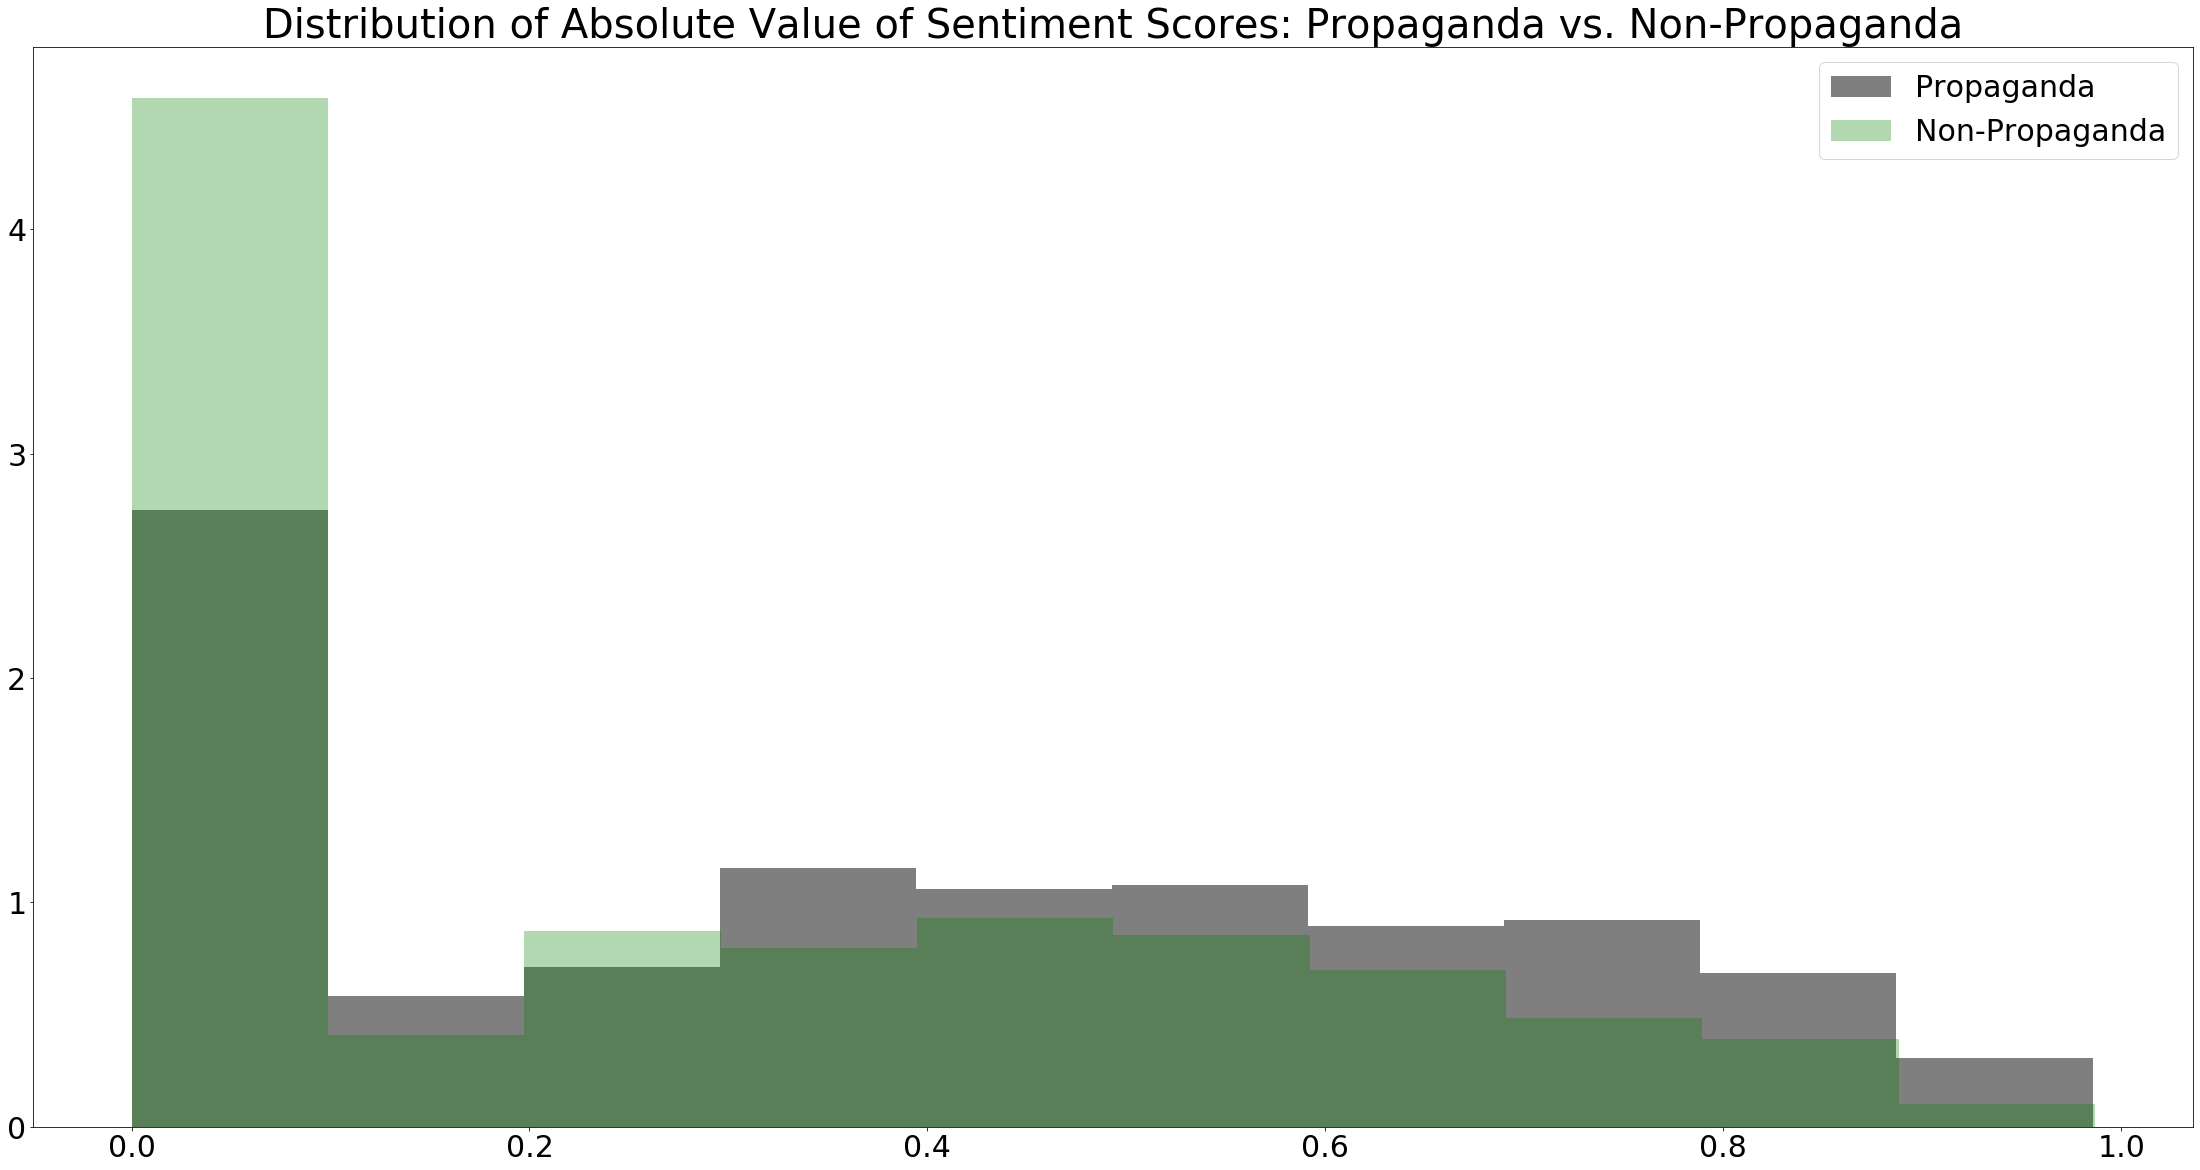

In [35]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])

abs_prop_sent = prop['abs_sent_score'].get_values()
abs_non_prop_sent = non_prop['abs_sent_score'].get_values()

plt.hist(abs_prop_sent,  alpha=0.5, label='Propaganda', color='black', density=True)
plt.hist(abs_non_prop_sent,  alpha=0.3, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Absolute Value of Sentiment Scores: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

## Punctuation Count

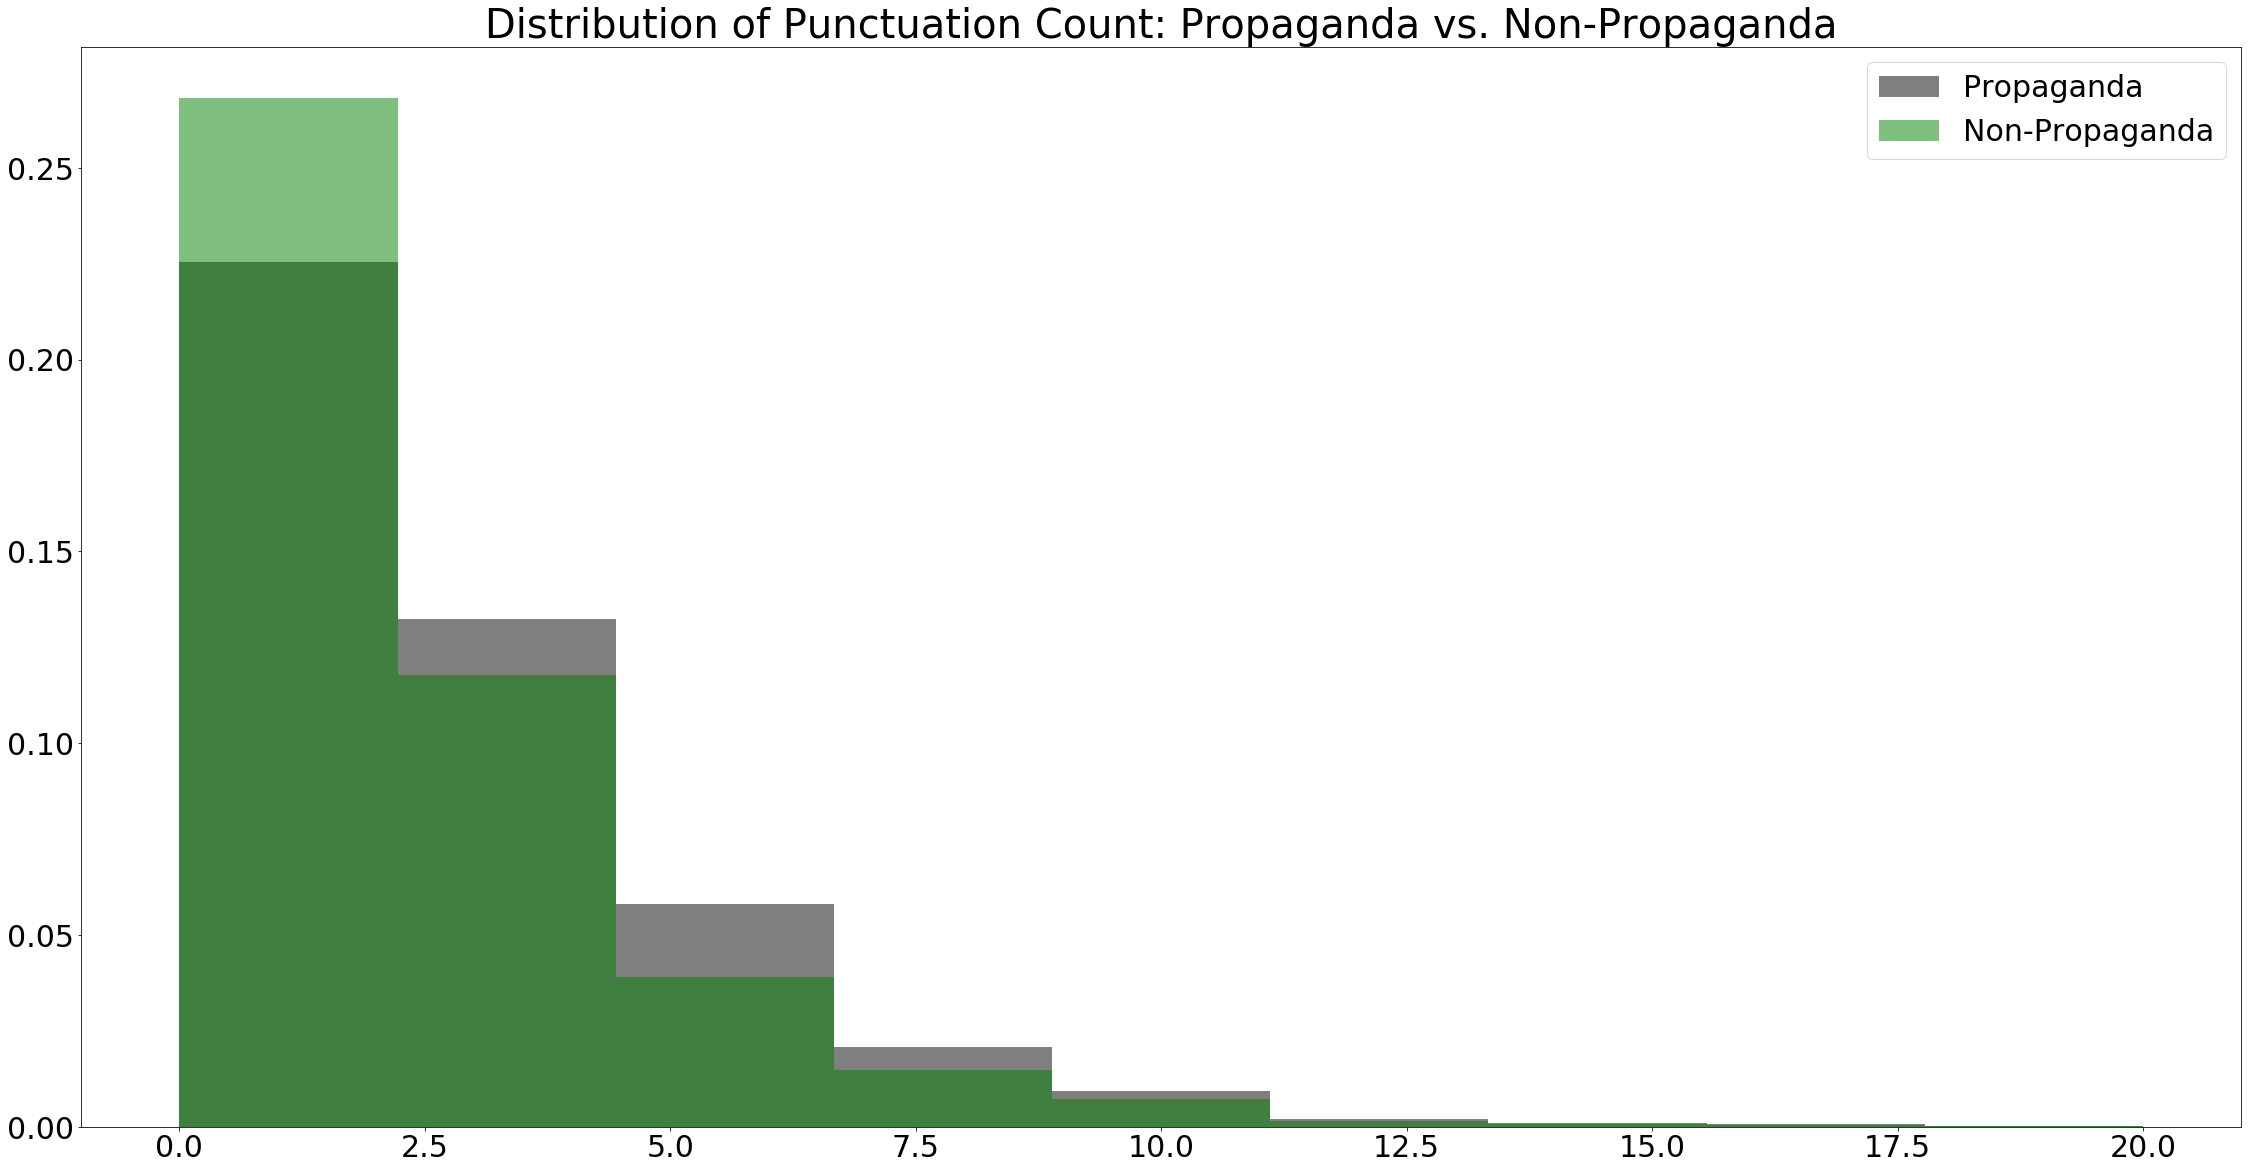

In [38]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])
bins = np.linspace(0, 20, 10)
prop_punct_count = prop['punct_count'].get_values()
non_prop_punct_count = non_prop['punct_count'].get_values()

plt.hist(prop_punct_count, bins, alpha=0.5, label='Propaganda', color='black', density=True)
plt.hist(non_prop_punct_count, bins, alpha=0.5, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Punctuation Count: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.show()

## Word Count

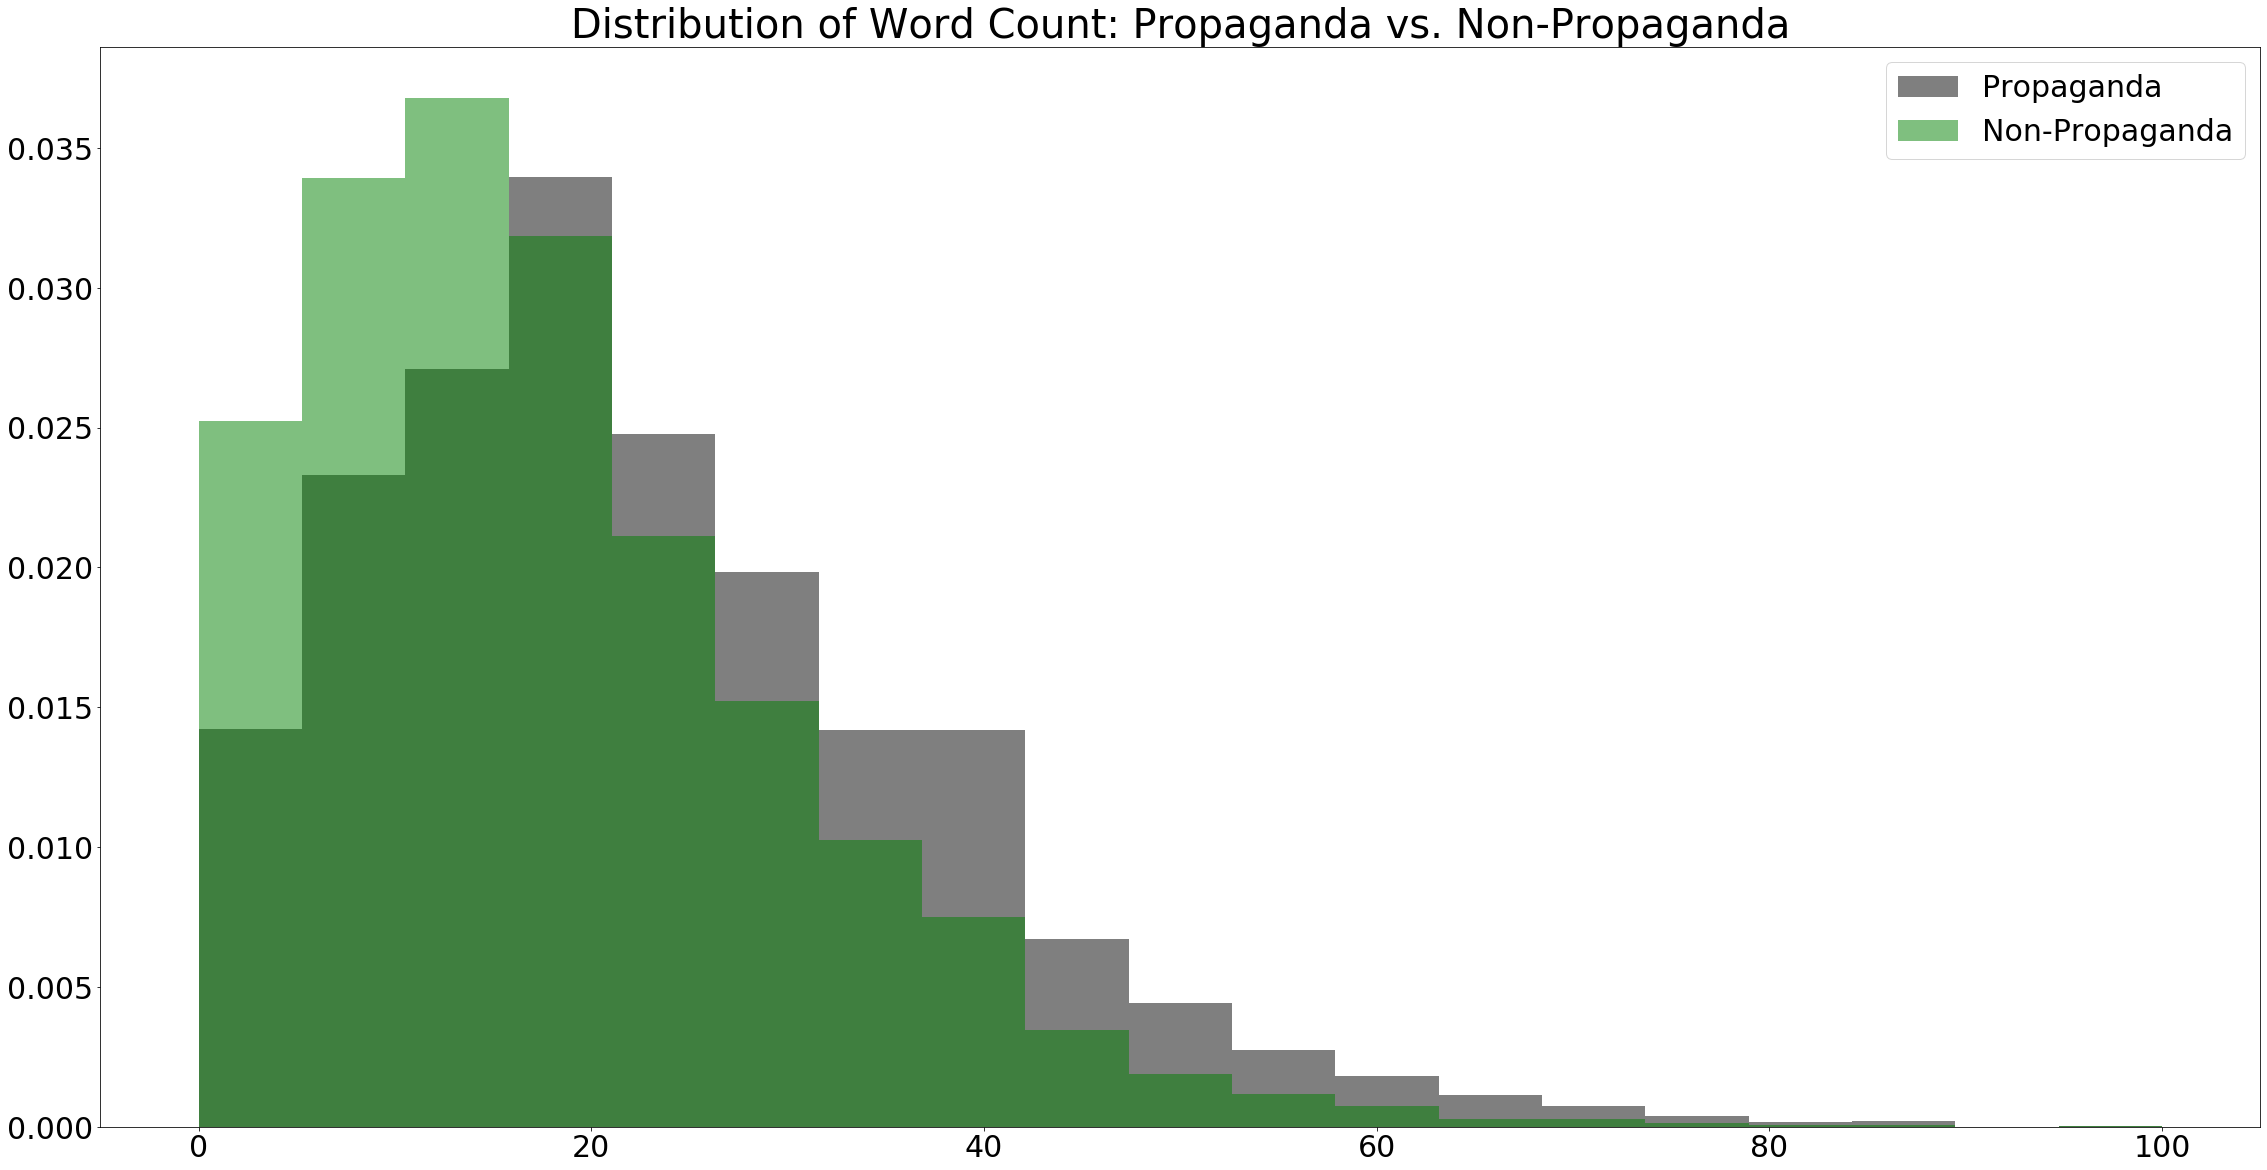

In [40]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])
bins = np.linspace(0, 100, 20)
prop_wc = prop['word_count'].get_values()
non_prop_wc = non_prop['word_count'].get_values()

plt.hist(prop_wc, bins, alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop_wc, bins, alpha=0.5, label='Non-Propaganda', color='green',density=True)
plt.title('Distribution of Word Count: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### As you can see above, the average word count for propagandistic and non-propagandistic sentences is different. This is confirmed below.

In [338]:
avg_prop_wc = np.mean(prop['word_count'])
avg_non_prop_wc = np.mean(non_prop['word_count'])
print(avg_prop_wc,avg_non_prop_wc)

23.225393925553778 17.928881099529562


## Part of Speech

### Proportion of Adjectives

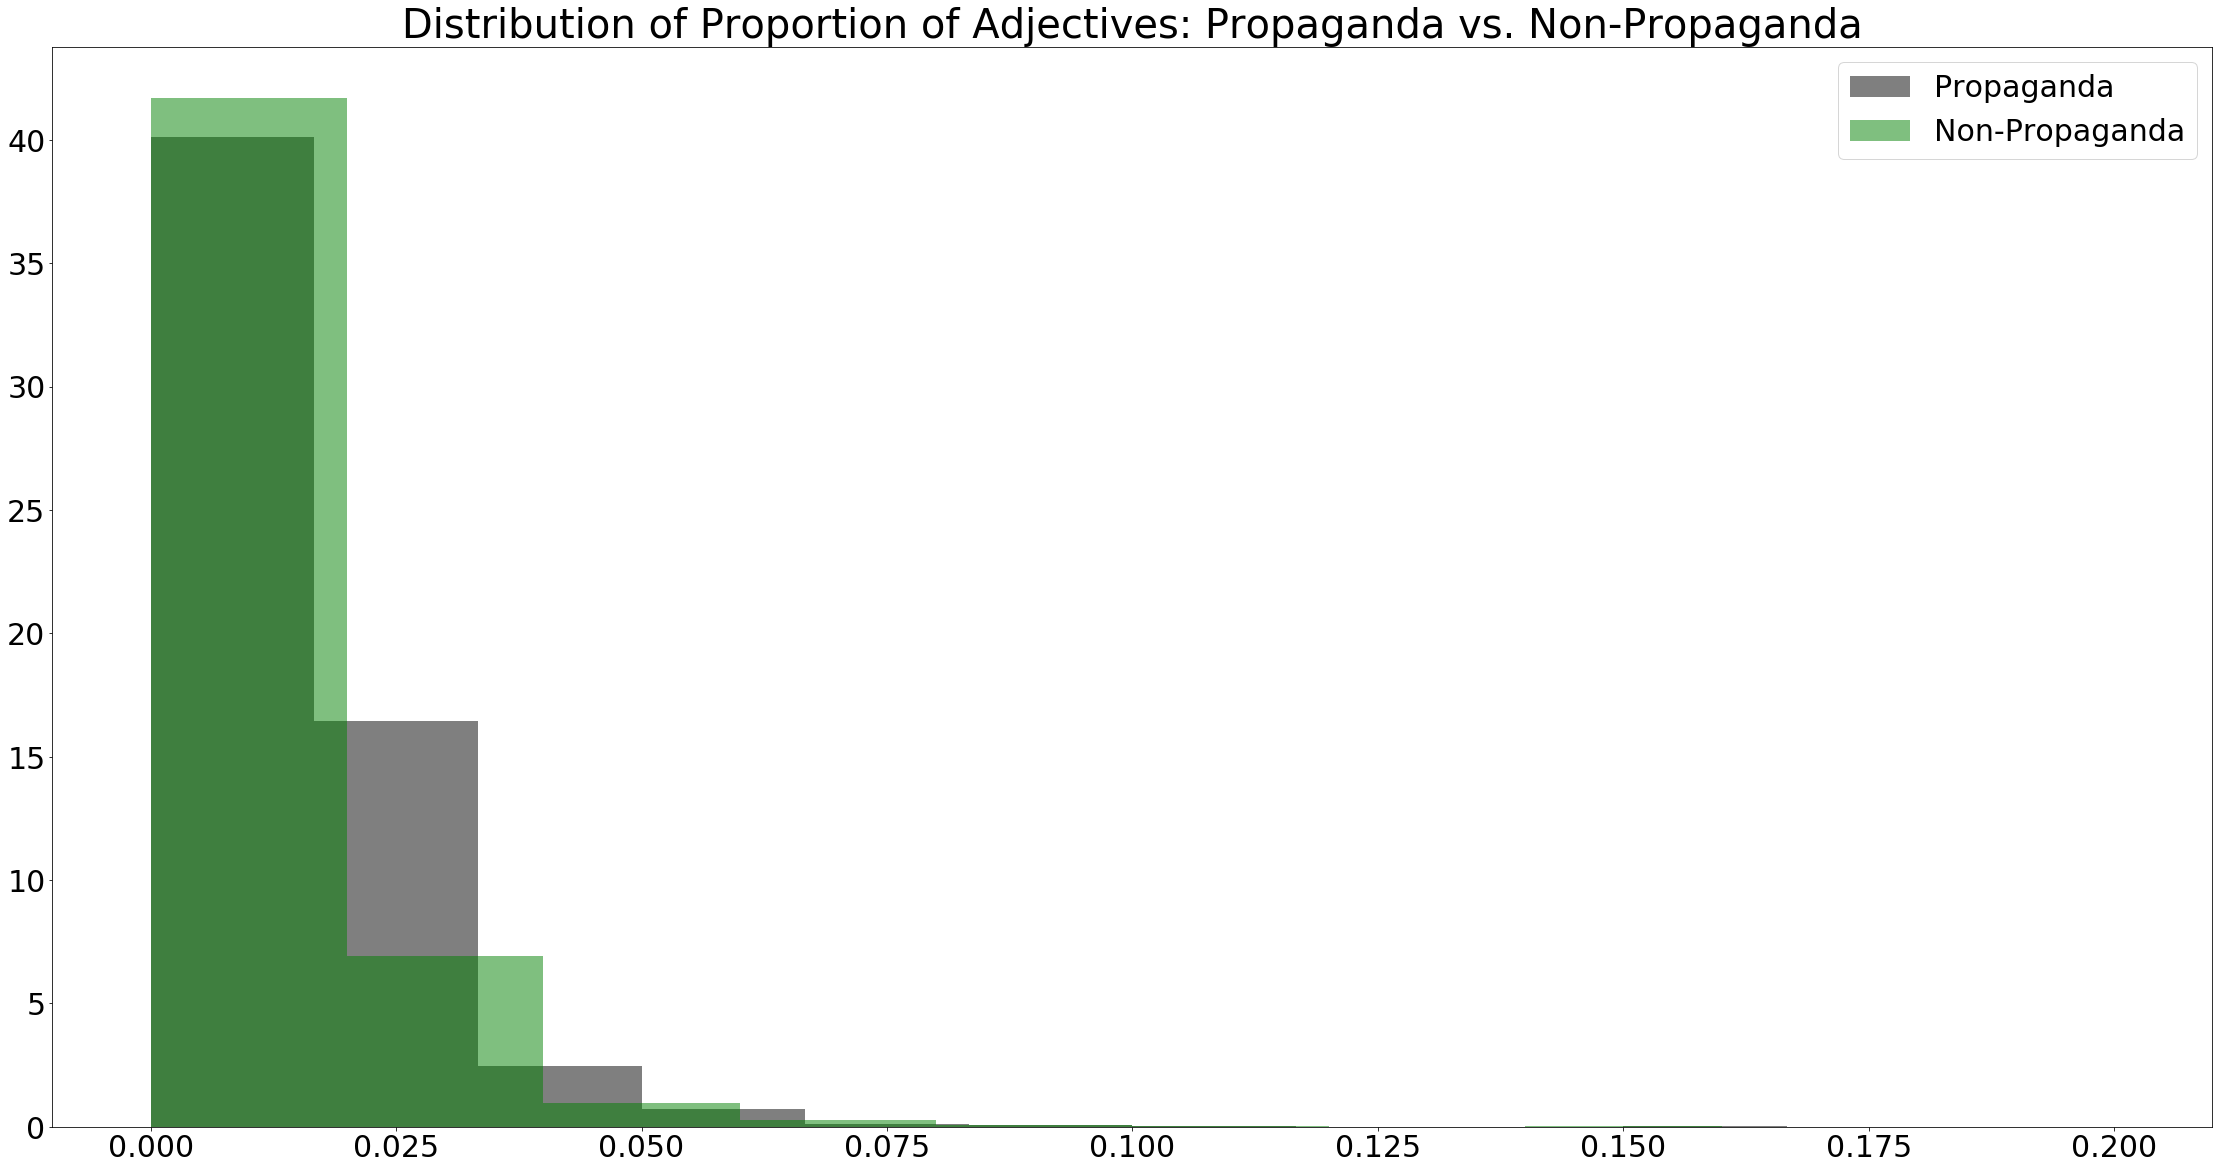

In [41]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(prop['%adj'], alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop['%adj'], alpha=0.5, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Proportion of Adjectives: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

### Proportion of Verbs

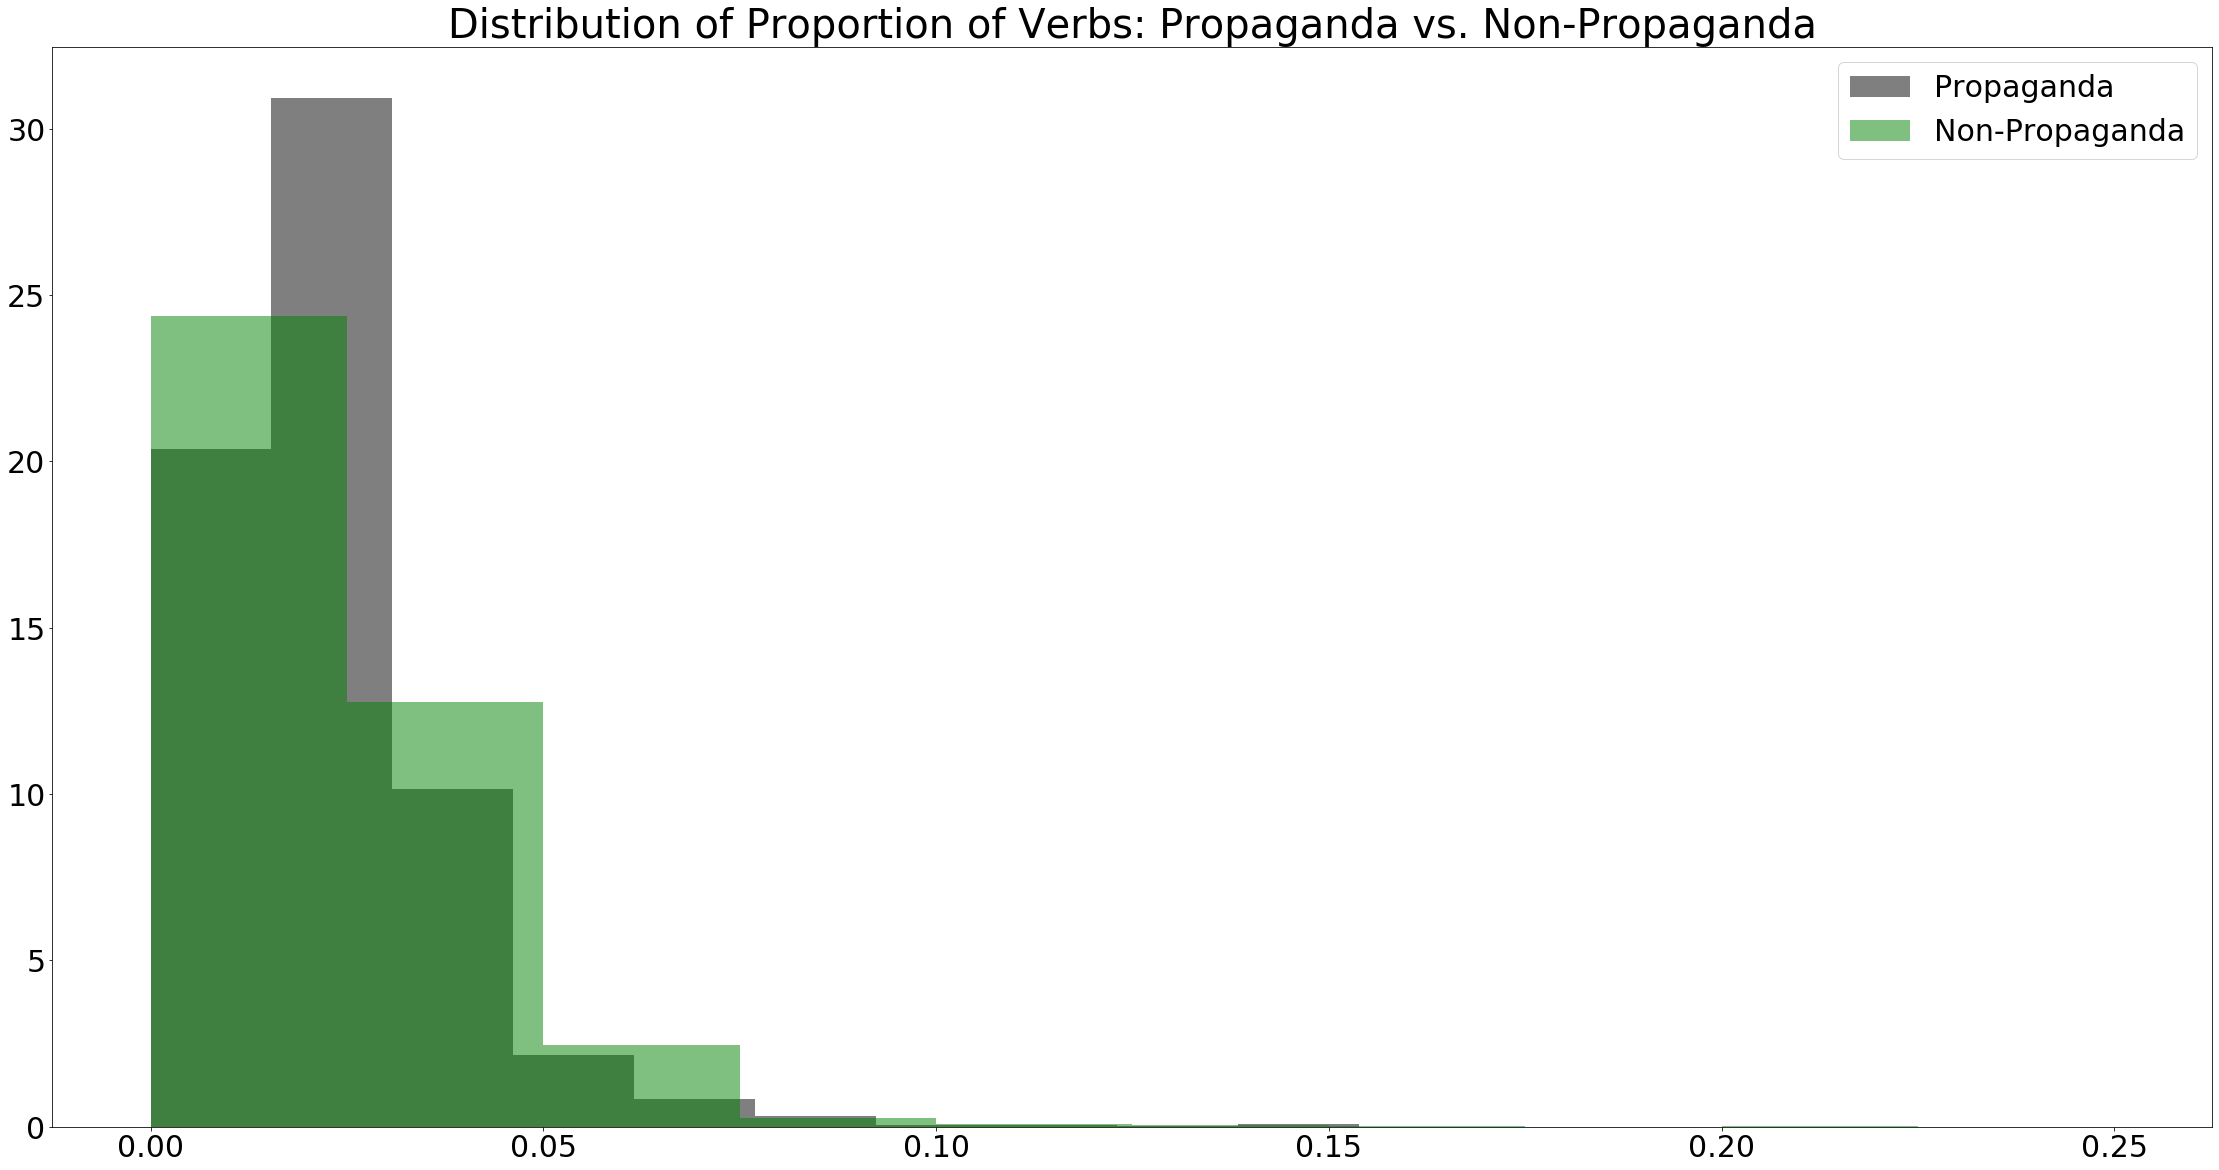

In [42]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(prop['%verb'], alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop['%verb'], alpha=0.5, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Proportion of Verbs: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

### Proportion of Adverbs

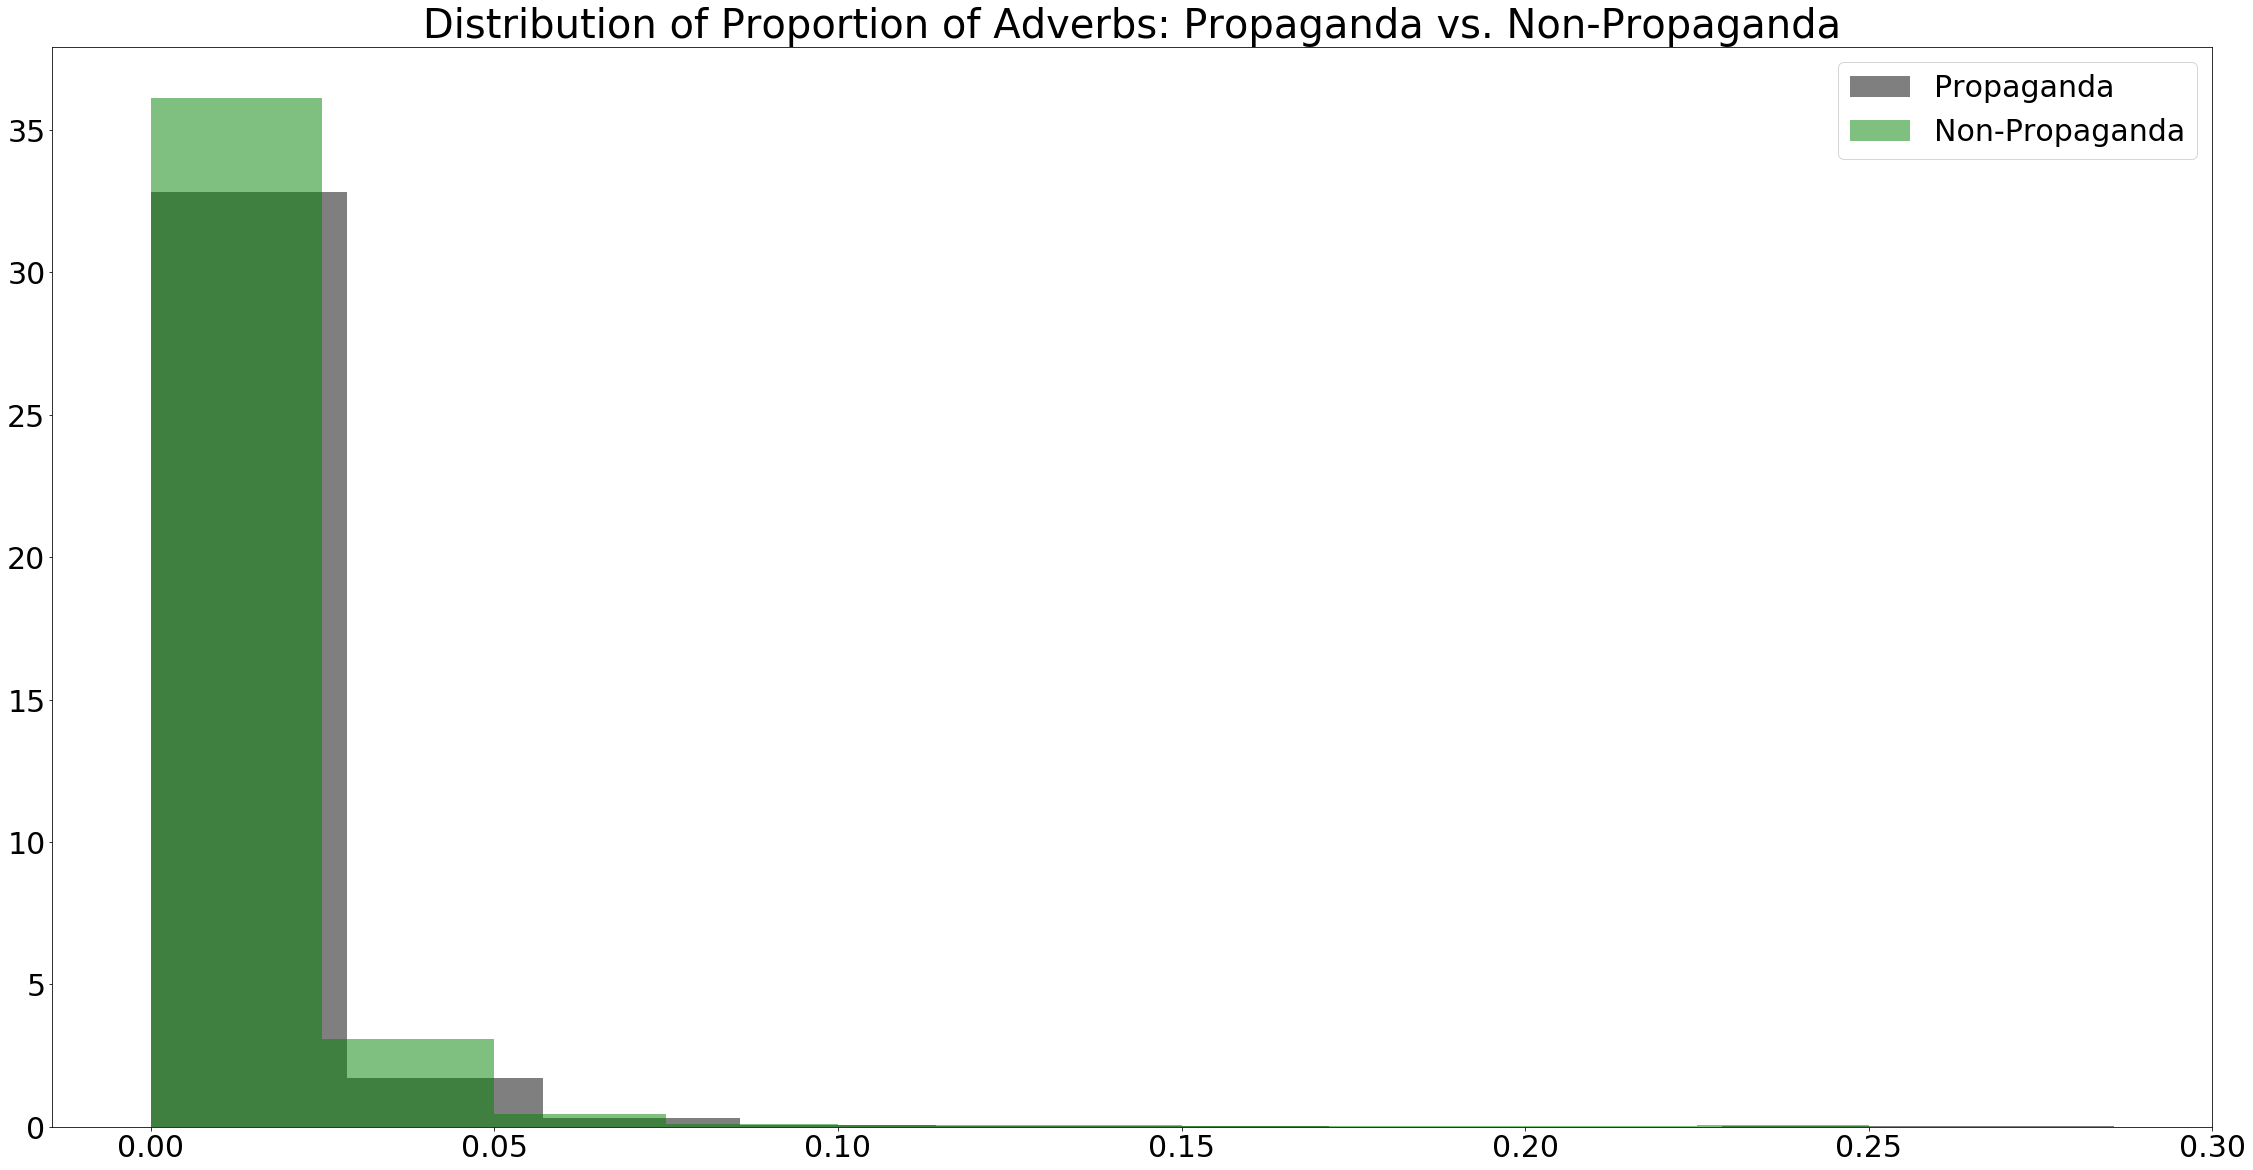

In [43]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(prop['%adv'], alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop['%adv'], alpha=0.5, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Proportion of Adverbs: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

### Proportion of Nouns

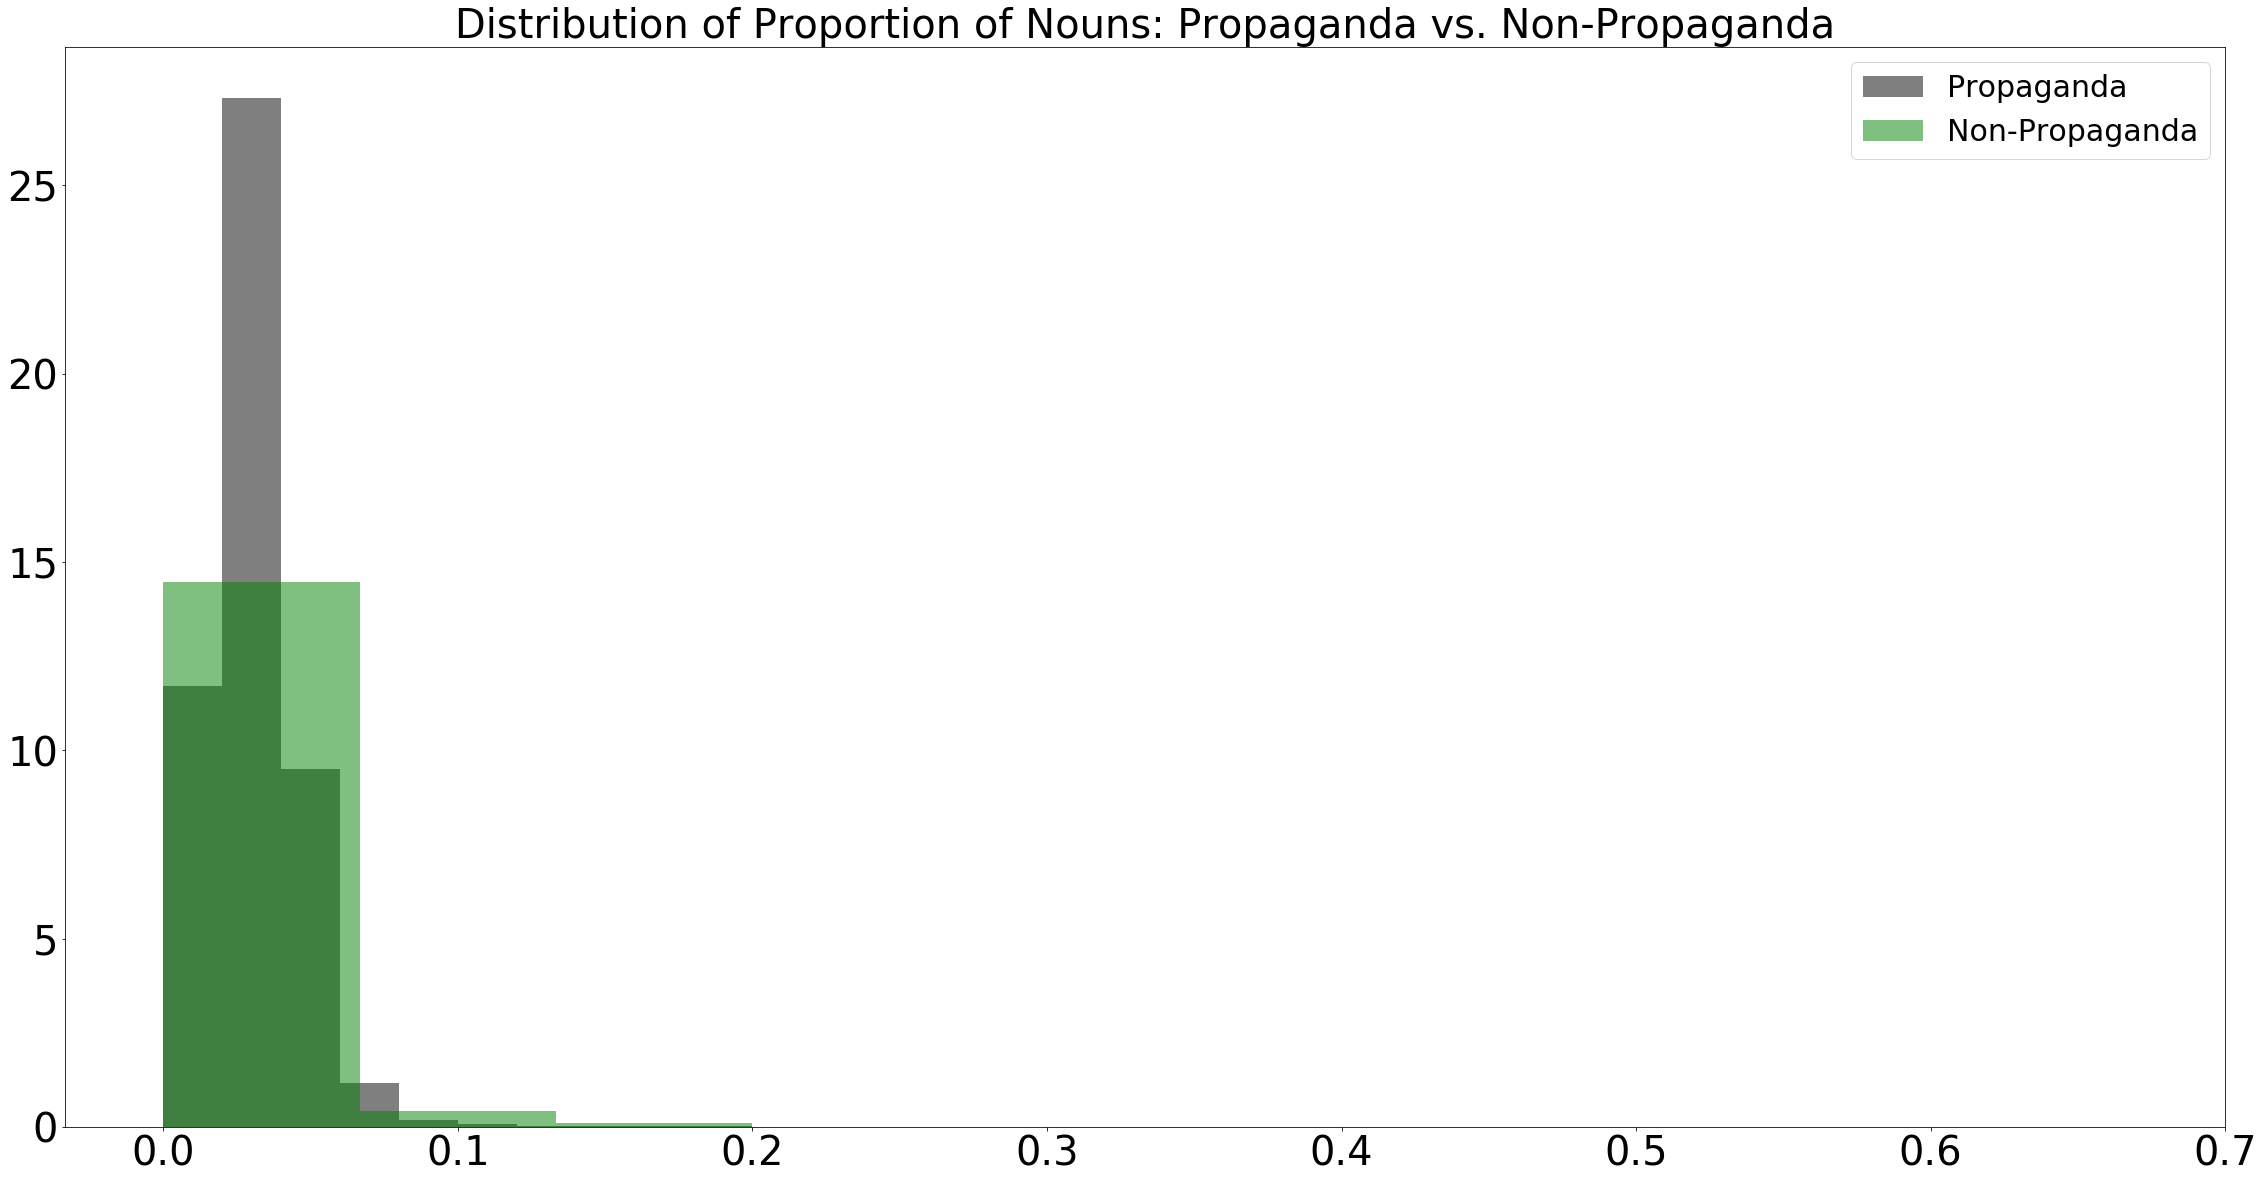

In [8]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(prop['%noun'], alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop['%noun'], alpha=0.5, label='Non-Propaganda', color='green', density=True)
plt.title('Distribution of Proportion of Nouns: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

## Average Word Length

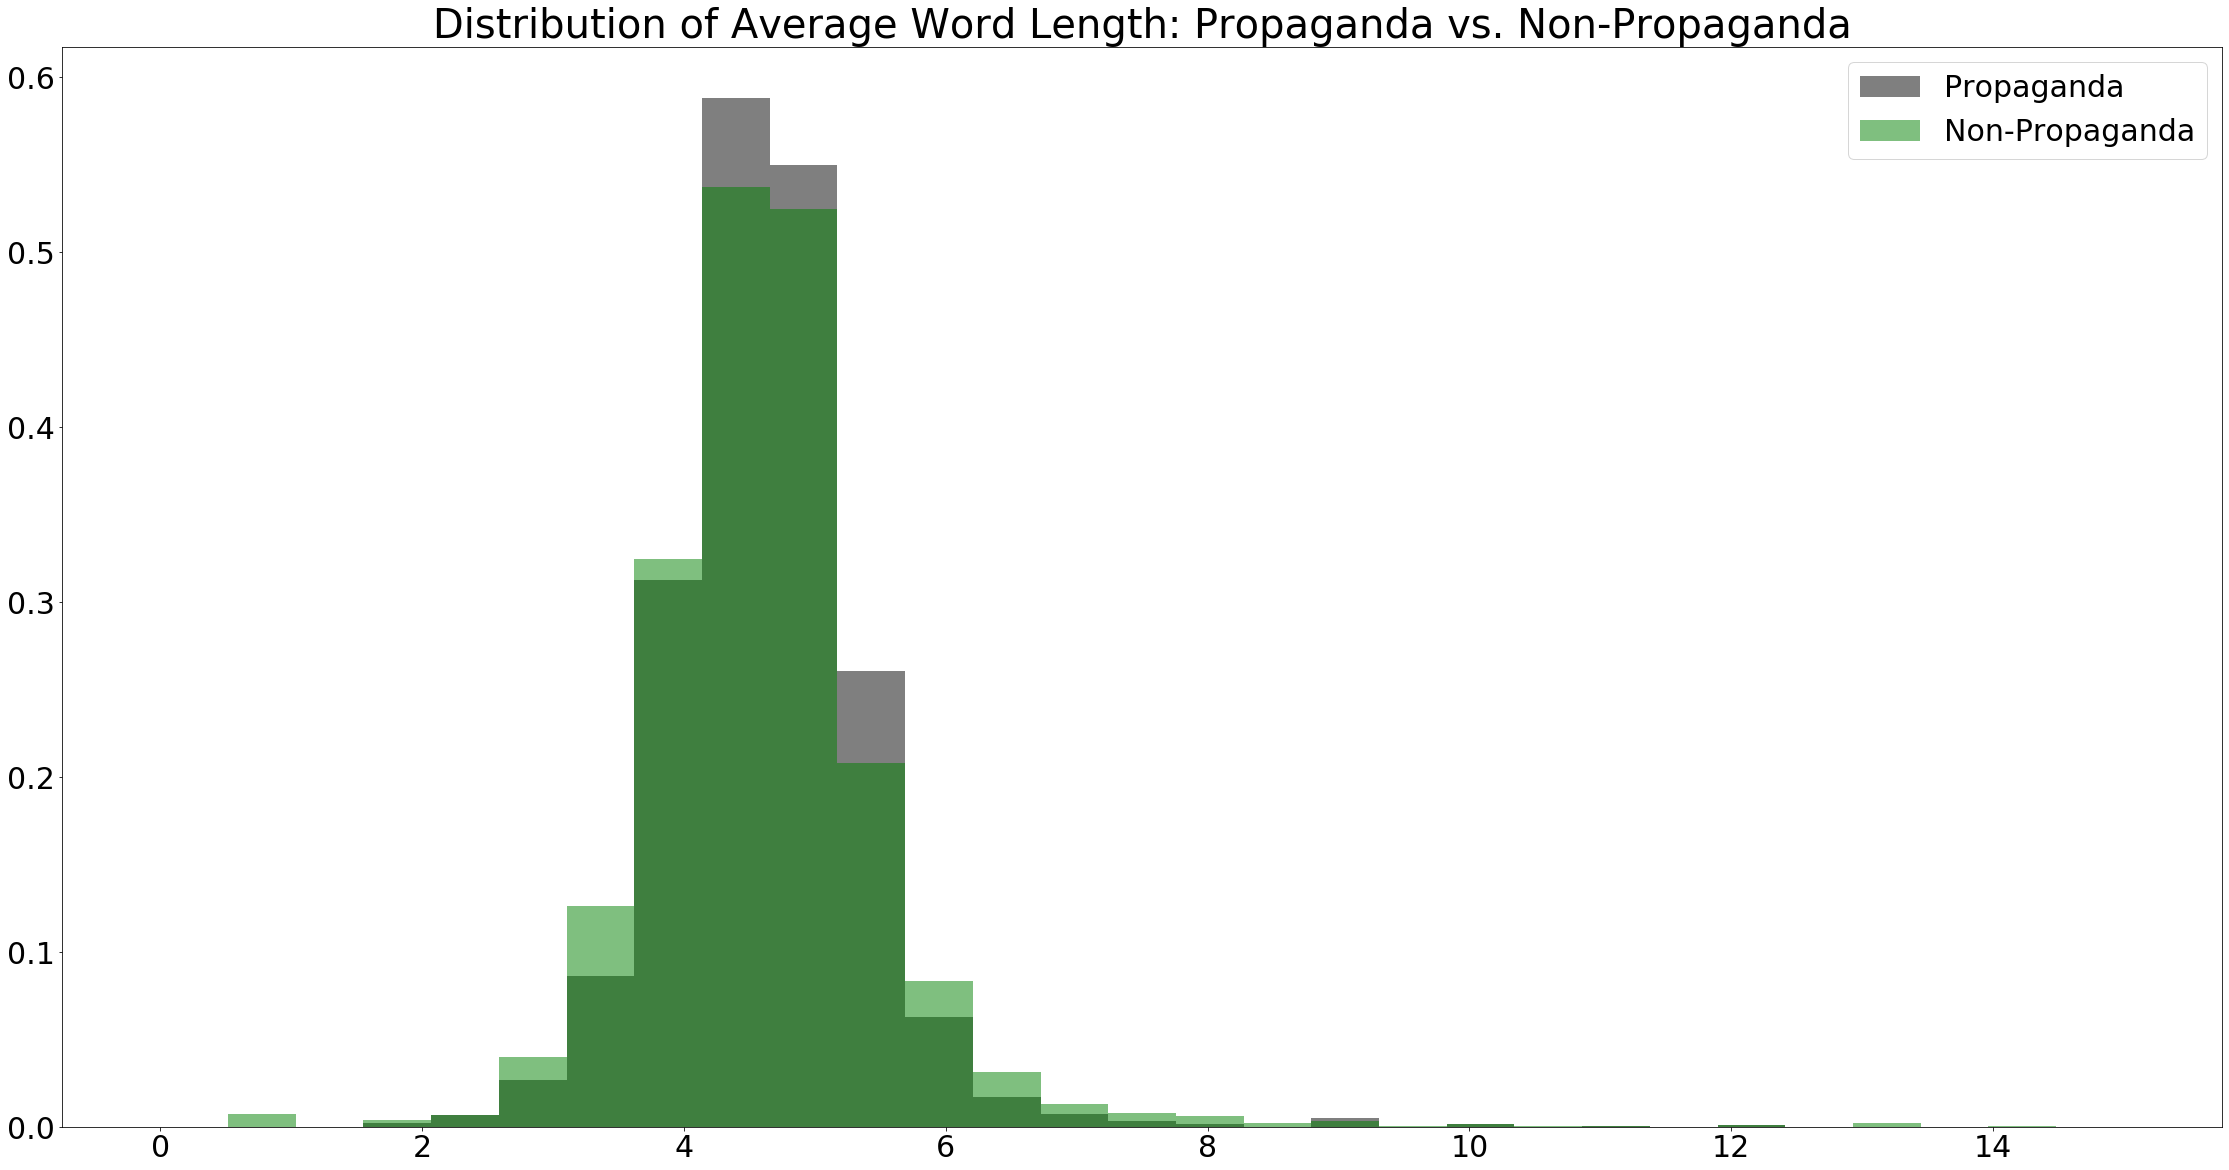

In [47]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])
bins = np.linspace(0, 15, 30)
prop_wl = prop['avg_word_length'].get_values()
non_prop_wl = non_prop['avg_word_length'].get_values()

plt.hist(prop_wl, bins, alpha=0.5, label='Propaganda', color='black',density=True)
plt.hist(non_prop_wl, bins, alpha=0.5, label='Non-Propaganda', color='green',density=True)
plt.title('Distribution of Average Word Length: Propaganda vs. Non-Propaganda', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.show()

## Most Common Words

### Most Common Words Corpus-Wide : Words to Add to STOP_WORDS

In [48]:
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [71]:
# dictionary of common contractions

In [74]:
#function to deal with expanding contractions in order to better tokenize

### I. Tokenizing

In [193]:
#IMPORTS
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

punctuation = string.punctuation
punctuation = punctuation+"..."+"--"+"“"+"”"+"``"+"''"+"’"+"–"+"—"+"‘"
lemmatizer = WordNetLemmatizer()

In [194]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...--“”``\'\'’–—‘'

In [195]:
contr_dict={"I’m": "I am",
            "won’t": "will not",
            "’s" : "", 
            "’ll":"will",
            "’ve ":"have ",
            "n’t":" not",
            "’re": "are",
            "’d": "would",
            "y’all": "all of you",
            "I'm": "I am",
            "won't": "will not",
            "'s" : "", 
            "'ll":"will",
            "'ve ":"have ",
            "n't":"not",
            "'re": "are",
            "'d": "would",
            "y'all": "all of you"}
contr_dict.keys()


dict_keys(['I’m', 'won’t', '’s', '’ll', '’ve ', 'n’t', '’re', '’d', 'y’all', "I'm", "won't", "'s", "'ll", "'ve ", "n't", "'re", "'d", "y'all"])

In [196]:
def replace_contractions(sentence, contr_dict=contr_dict):
    for contr in contr_dict.keys():
        if contr in sentence:
            sentence = sentence.replace(contr,contr_dict[contr])
    return sentence

In [197]:
# function to convert nltk tag to wordnet tag
# this is important because having the POS tag improves lemmatization
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [198]:
#tokenization and lemmatization function
def tokenize_sentence(sentence):
    #remove contractions
    sentence = replace_contractions(sentence, contr_dict=contr_dict)
    
    #tokenize the sentence
    mytokens = nltk.word_tokenize(sentence)
    
    #tag tokens with part of speech
    nltk_tagged = nltk.pos_tag(mytokens)
    
    # remove punctuation
    nltk_tagged = [ word for word in nltk_tagged if word[0] not in punctuation ]
    
    # strip all tokens and make lowercase 
    nltk_tagged = [ (word[0].lower().strip(),word[1]) for word in nltk_tagged ]
    
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_tokens = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tokens.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tokens.append(lemmatizer.lemmatize(word, tag))
            
        lemmatized_tokens = [word for word in lemmatized_tokens if word not in stop_words]
    return lemmatized_tokens


In [199]:
#testing tokenizer's lemmatization against just regular lemmatization method from nltk

print(lemmatizer.lemmatize("I am loving it")) #I am loving it
print(lemmatizer.lemmatize("loving")) #loving
print(lemmatizer.lemmatize("loving", "v")) #love
print(tokenize_sentence("I am loving it...")) #I be love it

I am loving it
loving
love
['love']


In [200]:
tups = [('I', 'PRP'), ('am', 'VBP'), ('loving', 'VBG'), ('it', 'PRP'), 
        ('--', ':'), ('canot', 'JJ'), ('ya', 'NN'), ('see', 'VB'), ('?', '.')]

In [179]:
for tup in tups:
    print(tup[0])
    print(type(tup[0]))

I
<class 'str'>
am
<class 'str'>
loving
<class 'str'>
it
<class 'str'>
--
<class 'str'>
canot
<class 'str'>
ya
<class 'str'>
see
<class 'str'>
?
<class 'str'>


In [67]:
# def simple_tokenizer_2(text):
#     text = replace_contractions(text,contr_dict)
#     mytokens = nlp(text)
# #     mytokens = [word for word in mytokens if (word.pos_ == "ADJ" or "ADV"or "VERB")]
#     mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
#     mytokens = [word for word in mytokens if word not in punctuation]
#     mytokens = [ word for word in mytokens if word not in stop_words]
#     return mytokens

In [201]:
reduced_df = df[['propaganda','text','propaganda_type']]

### Tokenizing Text for Each Sentence 

In [202]:
reduced_df['tokenized_text'] = reduced_df['text'].apply(lambda x: tokenize_sentence(x))

/Users/sashaepelbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Tokenized Corpus

In [203]:
# making one list of all tokens in corpus
tokenized_text = []
for text in reduced_df['tokenized_text']:
    tokenized_text.extend(text)

In [220]:
# counting how many times each token appears in corpus and returning top 100 tokens
from collections import Counter
tokenized_text_counts = Counter(tokenized_text)
top_100 = tokenized_text_counts.most_common(100)

print(top_100)

[('trump', 778), ('church', 602), ('pope', 570), ('state', 548), ('people', 514), ('know', 503), ('report', 495), ('time', 492), ('president', 468), ('year', 463), ('new', 426), ('tell', 397), ('bishop', 379), ('come', 371), ('kavanaugh', 361), ('cardinal', 349), ('case', 341), ('francis', 322), ('continue', 318), ('like', 314), ('catholic', 297), ('use', 296), ('government', 281), ('u.s.', 279), ('want', 277), ('day', 276), ('american', 276), ('god', 274), ('write', 269), ('official', 268), ('law', 268), ('work', 267), ('right', 263), ('claim', 260), ('life', 256), ('man', 250), ('public', 248), ('house', 248), ('include', 246), ('u', 245), ('fbi', 244), ('gun', 243), ('investigation', 242), ('think', 241), ('court', 240), ('ask', 240), ('clinton', 238), ('email', 237), ('world', 236), ('democrat', 236), ('good', 235), ('order', 233), ('attack', 231), ('abuse', 230), ('story', 227), ('fact', 226), ('way', 218), ('country', 217), ('accord', 216), ('news', 208), ('charge', 208), ('belie

### Top 100 words for propaganda sentences

In [207]:
prop_tokenized = reduced_df[reduced_df['propaganda']=='propaganda']['tokenized_text']
# making one list of all tokens in propaganda documents
prop_tokenized_text = []
for text in prop_tokenized:
    prop_tokenized_text.extend(text)
    
prop_tokenized_text_counts = Counter(prop_tokenized_text)
prop_top_100 = prop_tokenized_text_counts.most_common(100)

print(prop_top_100)

[('trump', 319), ('church', 257), ('people', 209), ('know', 178), ('pope', 172), ('president', 163), ('state', 161), ('like', 140), ('time', 140), ('american', 138), ('catholic', 133), ('tell', 132), ('new', 129), ('year', 123), ('come', 119), ('god', 119), ('world', 118), ('life', 116), ('report', 115), ('bishop', 111), ('kavanaugh', 107), ('muslim', 106), ('francis', 106), ('gun', 106), ('man', 105), ('claim', 104), ('want', 102), ('attack', 101), ('continue', 101), ('cardinal', 101), ('write', 99), ('law', 98), ('government', 97), ('case', 97), ('country', 97), ('right', 96), ('democrat', 95), ('assange', 94), ('clinton', 93), ('fact', 93), ('public', 90), ('think', 87), ('story', 86), ('medium', 84), ('election', 84), ('u', 84), ('believe', 83), ('judge', 83), ('history', 82), ('guardian', 82), ('good', 81), ('evidence', 80), ('fbi', 79), ('america', 79), ('official', 78), ('use', 78), ('way', 77), ('investigation', 77), ('order', 75), ('homosexual', 75), ('u.s.', 75), ('work', 73)

In [213]:
prop_top_tokens = set([tup[0] for tup in prop_top_100])

### Top 100 words for non-propaganda sentences

In [209]:
non_prop_tokenized = reduced_df[reduced_df['propaganda']=='non-propaganda']['tokenized_text']
# making one list of all tokens in propaganda documents
non_prop_tokenized_text = []
for text in non_prop_tokenized:
    non_prop_tokenized_text.extend(text)
    
non_prop_tokenized_text_counts = Counter(non_prop_tokenized_text)
non_prop_top_100 = non_prop_tokenized_text_counts.most_common(100)

print(non_prop_top_100)

[('trump', 459), ('pope', 398), ('state', 387), ('report', 380), ('time', 352), ('church', 345), ('year', 340), ('know', 325), ('president', 305), ('people', 305), ('new', 297), ('bishop', 268), ('tell', 265), ('kavanaugh', 254), ('come', 252), ('cardinal', 248), ('case', 244), ('use', 218), ('continue', 217), ('francis', 216), ('day', 205), ('u.s.', 204), ('work', 194), ('official', 190), ('email', 188), ('court', 186), ('government', 184), ('include', 182), ('house', 178), ('want', 175), ('ask', 175), ('like', 174), ('write', 170), ('law', 170), ('charge', 168), ('right', 167), ('fbi', 165), ('investigation', 165), ('catholic', 164), ('u', 161), ('accord', 160), ('letter', 160), ('leave', 160), ('public', 158), ('abuse', 158), ('order', 158), ('claim', 156), ('god', 155), ('good', 154), ('think', 154), ('member', 153), ('news', 148), ('confirm', 147), ('man', 145), ('clinton', 145), ('department', 144), ('la', 143), ('vega', 143), ('priest', 142), ('story', 141), ('way', 141), ('poll

In [212]:
non_prop_top_tokens = set([tup[0] for tup in non_prop_top_100])

### Subtract the intersection of both lists to get unique top words for each category

In [214]:
unique_prop_top_tokens = prop_top_tokens - non_prop_top_tokens

In [218]:
print(unique_prop_top_tokens)

{'muslim', 'jew', 'bergoglio', 'election', 'authority', 'history', 'thing', 'christian', 'lead', 'america', 'men', 'administration', 'act', 'change', 'sexual', 'guardian', 'lie', 'great', 'happen', 'bad', 'word', 'statement', 'jewish', 'truth', 'death', 'power', 'assange', 'war', 'homosexual', 'justice'}


In [215]:
unique_non_prop_top_tokens = non_prop_top_tokens - prop_top_tokens

In [217]:
print(unique_non_prop_top_tokens)

{'letter', 'release', 'police', 'la', 'issue', 'policy', 'month', 'email', 'paddock', 'leave', 'consider', 'access', 'accord', 'united', 'court', 'obama', 'place', 'week', 'charge', 'article', 'force', 'border', 'free', 'post', 'vega', 'poll', 'department', 'member', 'confirm', 'iran'}


In [221]:
tokenize_sentence('She cried furiously when she went to the zoo and saw the state church.')

['cry', 'furiously', 'zoo', 'saw', 'state', 'church']

## Distribution of POS for Different Propaganda Types

The concern here is that even though many of the most common words in the corpus are nouns shared by both propaganda and non-propaganda, there seems to be a slight difference in the distribution of nouns and adjectives in the two most common propaganda types. If we filter out too many nouns, we may end up making it harder to classify the noun-based propaganda strategies (such as name calling).

In [61]:
Name_Calling_Labeling = prop[prop['propaganda_type']=='Name_Calling,Labeling']
Loaded_Language = prop[prop['propaganda_type']=='Loaded_Language']

In [63]:
ncl_adjs = Name_Calling_Labeling['%adj']
ncl_nouns = Name_Calling_Labeling['%noun']
ll_adjs = Loaded_Language['%adj']
ll_nouns = Loaded_Language['%noun']

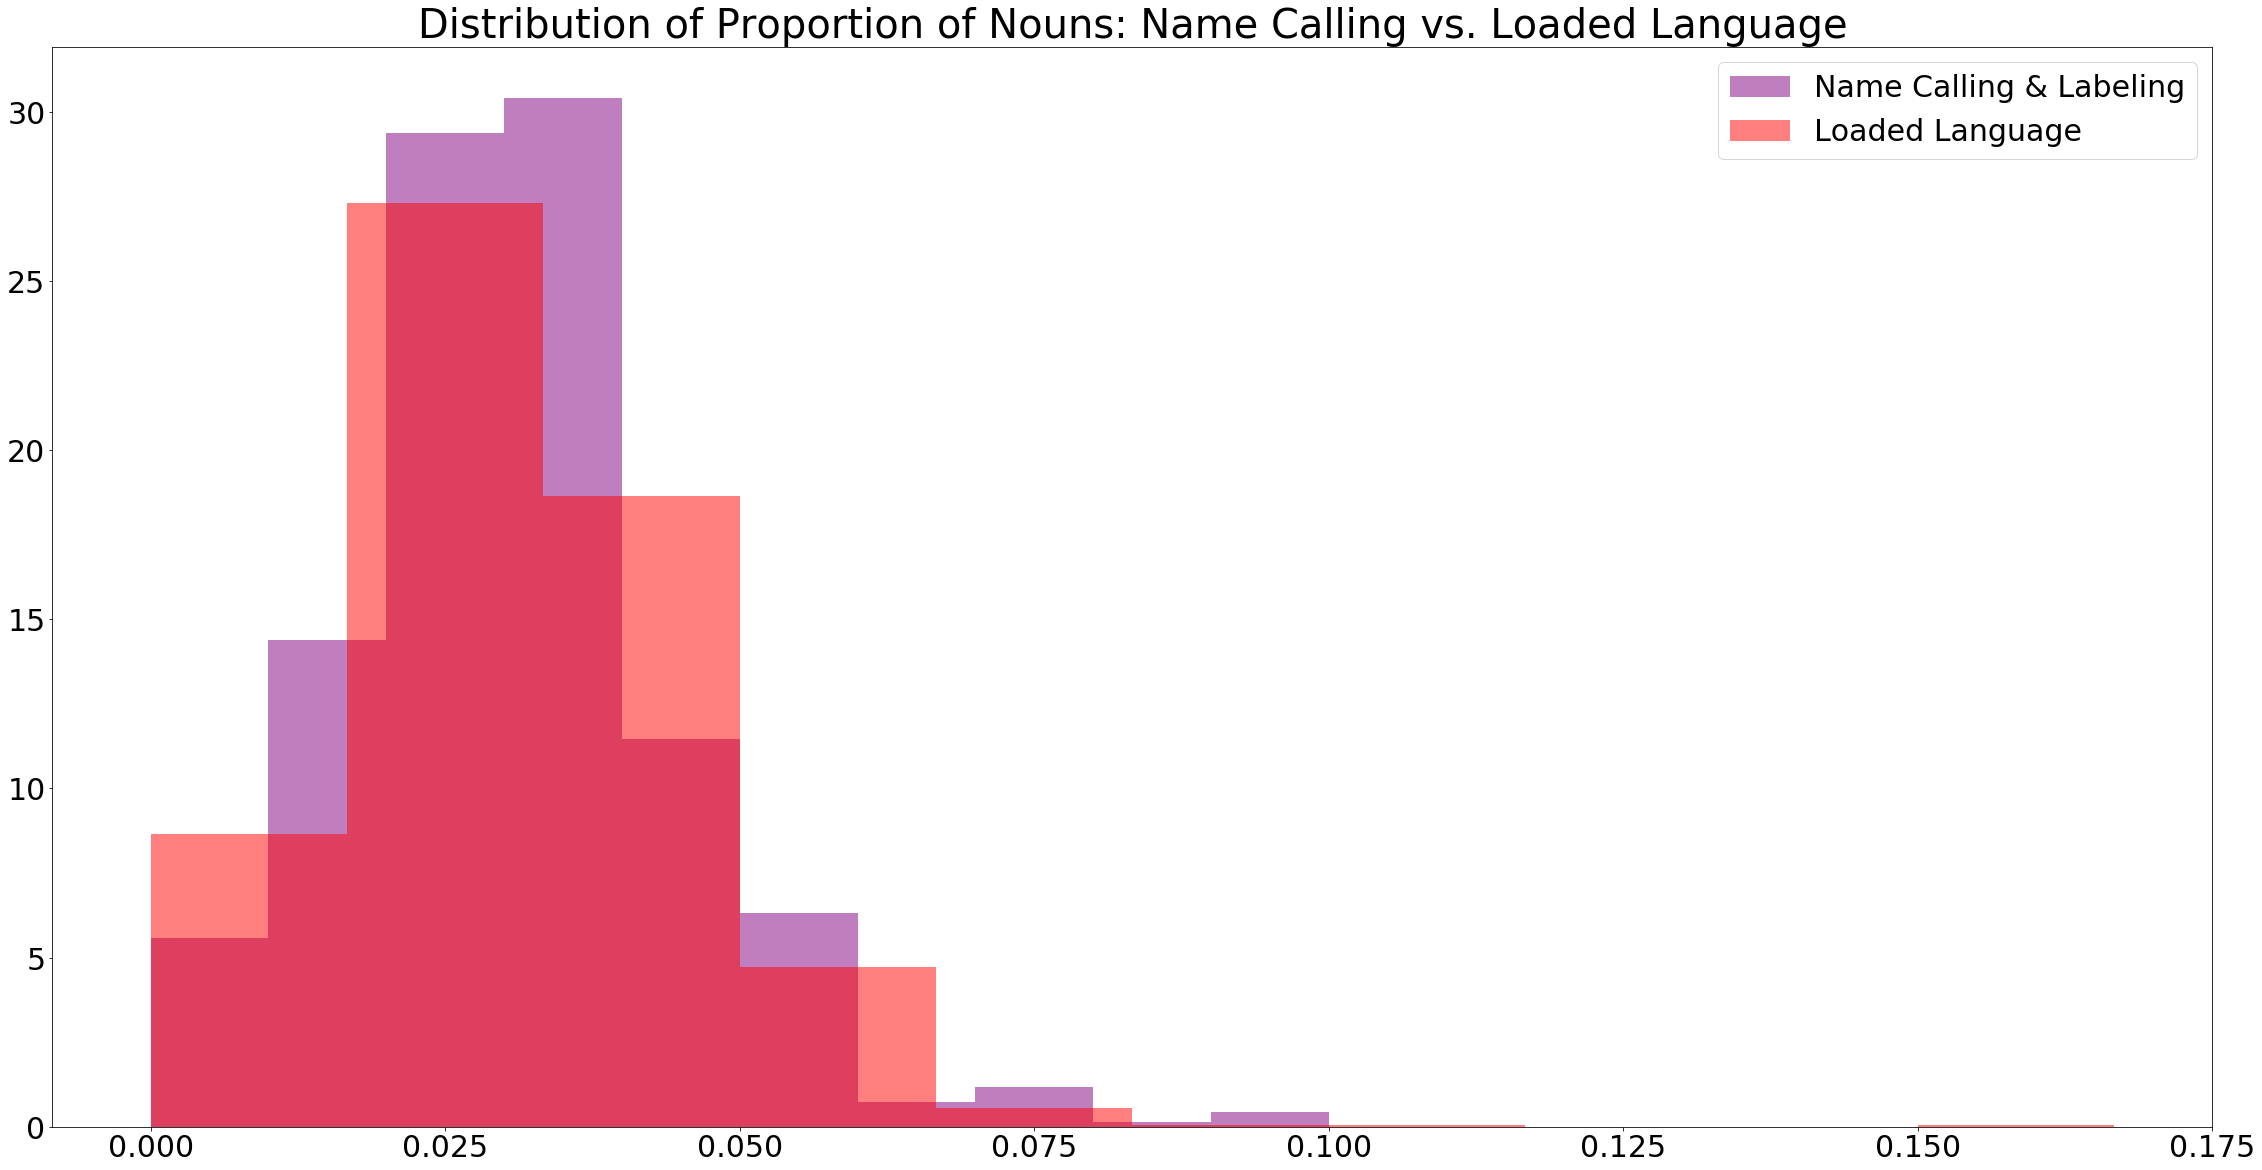

In [65]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(ncl_nouns, alpha=0.5, label='Name Calling & Labeling', color='purple',density=True)
plt.hist(ll_nouns, alpha=0.5, label='Loaded Language', color='red', density=True)
plt.title('Distribution of Proportion of Nouns: Name Calling vs. Loaded Language', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()

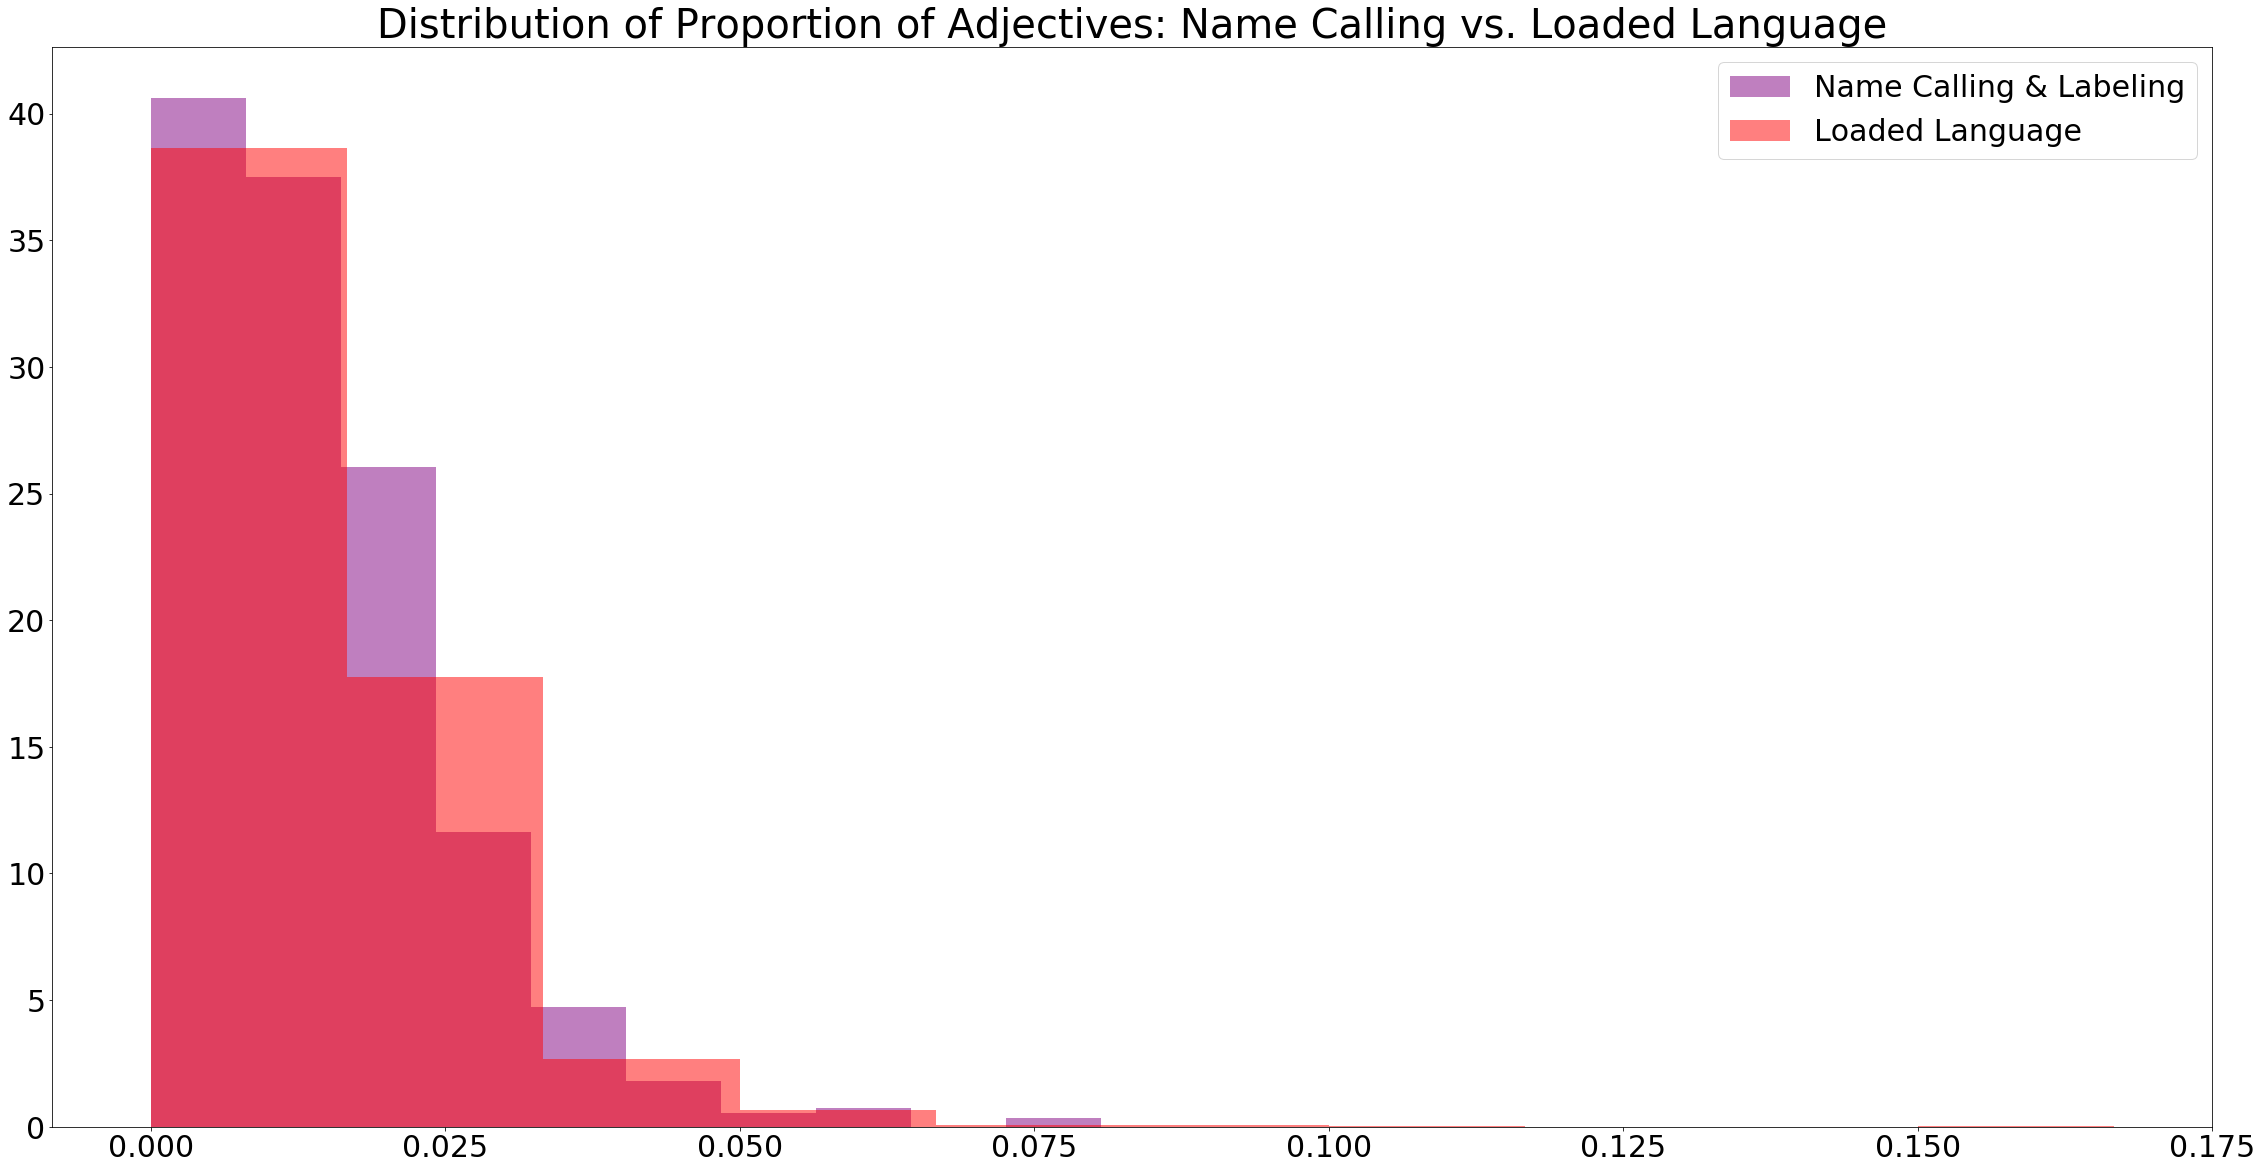

In [66]:
from matplotlib import pyplot
fig_2 = plt.figure(figsize=(30,15))

ax_2 = fig_2.add_axes([0,0,1,1])


plt.hist(ncl_adjs, alpha=0.5, label='Name Calling & Labeling', color='purple',density=True)
plt.hist(ll_adjs, alpha=0.5, label='Loaded Language', color='red', density=True)
plt.title('Distribution of Proportion of Adjectives: Name Calling vs. Loaded Language', fontsize=40)
plt.legend(loc='upper right', fontsize=30)
plt.rc('xtick', labelsize=30)     
plt.rc('ytick', labelsize=30)
plt.show()